## Characterisation of whole genome sequence data from South African Neisseria gonorrhoeae isolates
This notebook will be a documentation of data explored and figures generated for my 4th year master's project. I am analysing whole-genome sequence data of Neisseria Gonorrhoea from South Africa. These are my main objectives:

1) Characterisation of genomes
2) Identification of anti-microbial resistance determinants
3) Comparison of genomes

While I will analyse my South African dataset alone, I will also analyse it in conjunction with (i) other available South African isolate data, (ii) data for isolates across the continent of Africa and (iii) data for isolates across the globe. These additional data will be acquired through the online database PubMLST.

### Introduction

In [2]:
import importlib
import Functions
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

importlib.reload(Functions)


<module 'Functions' from '/Users/rudifield/Documents/PycharmProjects/NGonorrhoeae_Y4/Functions.py'>

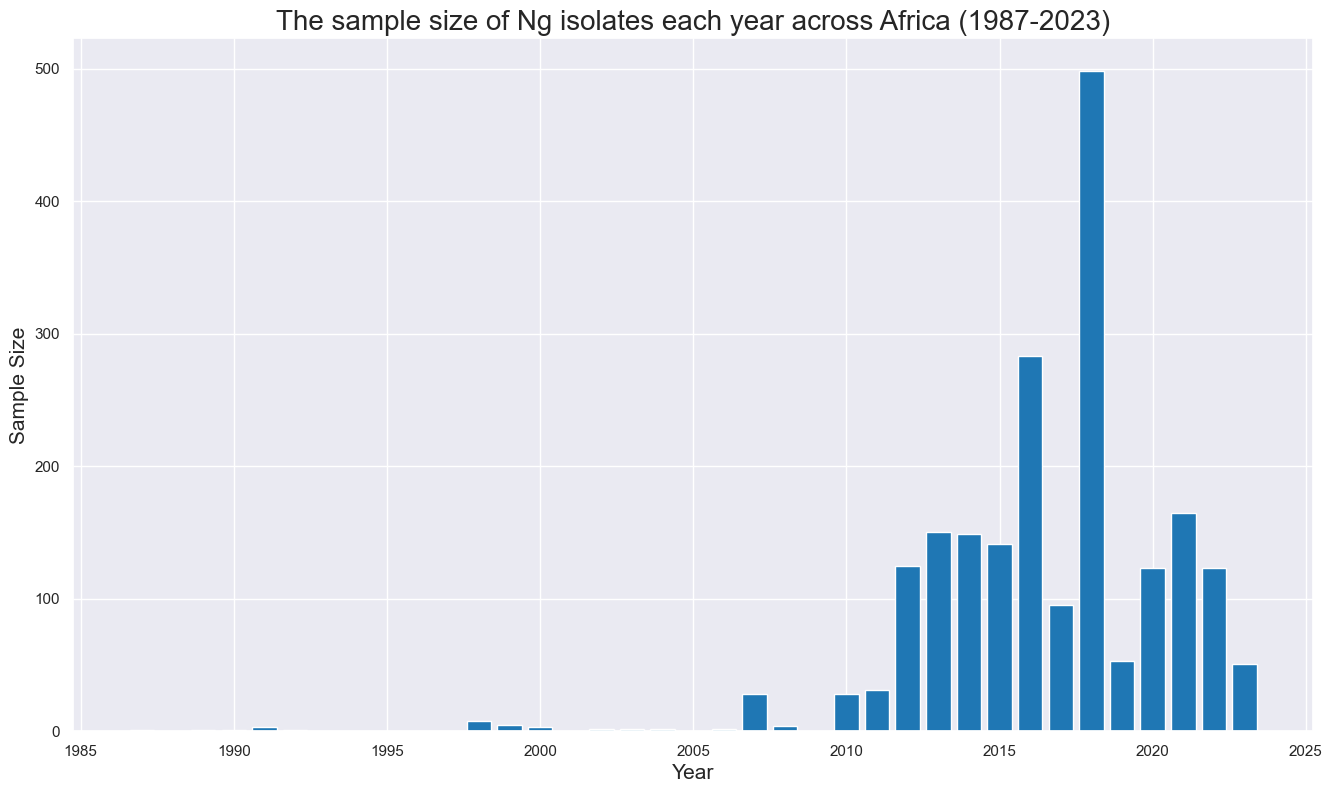

In [3]:
    # importing data from across Africa
afr: pd.DataFrame = pd.read_csv("Data/africa_country.csv", sep = ",", header = "infer")

    # keeping only ID, country and year
afr.drop(columns = ["private_record", "private_owner"], inplace = True)

    # counting no. samples each year
year_count = afr.groupby("year").year.count()

    # converting series to DataFrame
year_df = pd.DataFrame({"year": year_count.index, "sample_size": year_count.values})


    # bar graph
sns.set_theme(style = "darkgrid")

Functions.bar(x = year_df.year, y = year_df.sample_size, xlab = "Year", ylab = "Sample Size", title = "The sample size of Ng isolates each year across Africa (1987-2023)")

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)

plt.show()


This figure shows the number of Neisseria Gonorrhoeae isolates (available on PubMLST) collected across Africa through time. 2012 is the first year that data that forms my South African data was collected. This highlights a major problem regarding surveillance of Neisseria Gonorrhoeae in Africa and the need for projects that collects and analyses large quantities of isolates.

In [4]:
    # counting no. isolates in each combination of country & year
country_year = afr.groupby(["country", "year"]).count().reset_index()
    
    # renaming column header 
country_year.rename(columns = {"id": "sample_size"}, inplace = True)

    
    # creating a pivot table
pivot_df = country_year.pivot_table(index = "year", columns = "country", values = "sample_size")
   

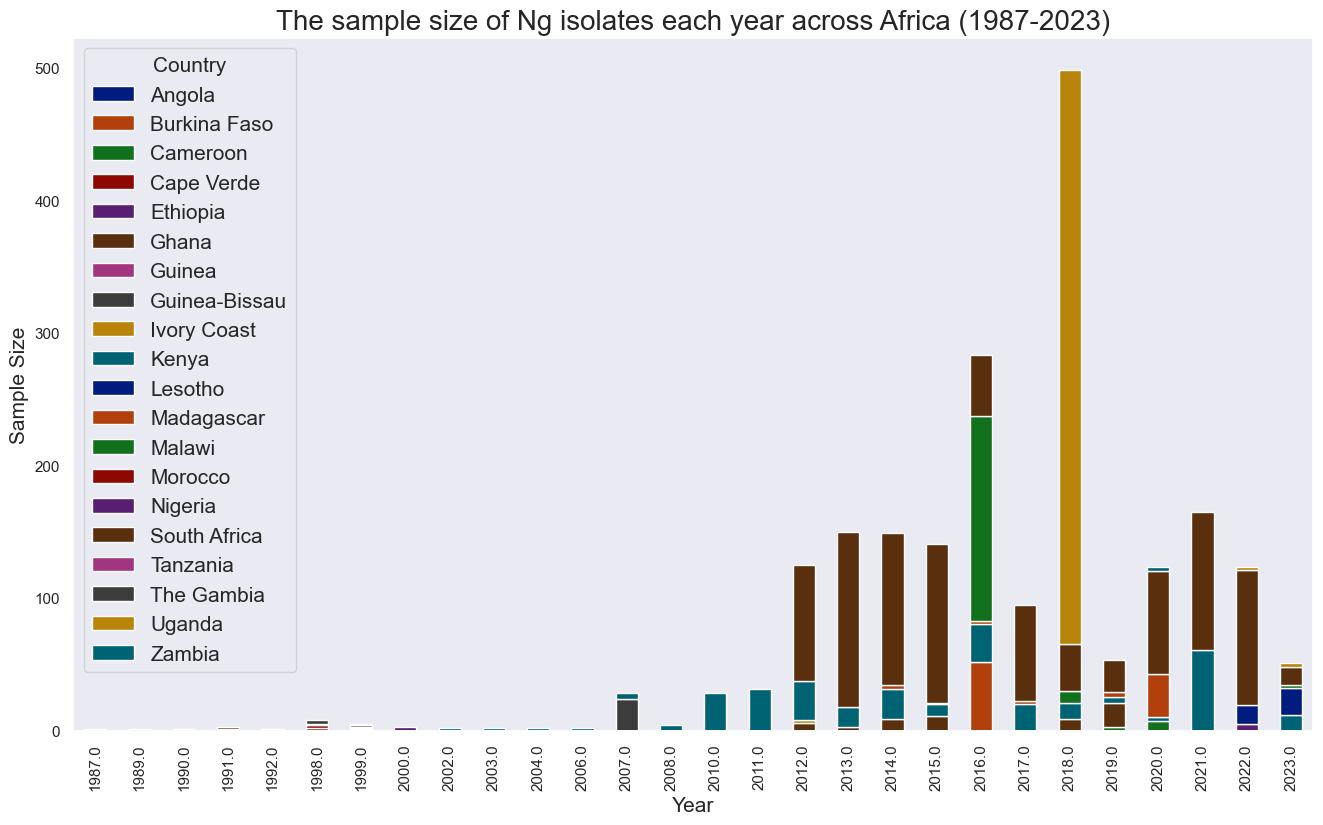

In [5]:
 # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

pivot_df.plot(kind = "bar", stacked = True, figsize = (16,9), xlabel = "Year", ylabel = "Sample Size")

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The sample size of Ng isolates each year across Africa (1987-2023)", fontsize = 20)
#plt.axhline(y = 100)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


Not only is there a lack of good surveillance in Africa but there is large disproportion in terms of the countries that are represented. South Africa makes up a large proportion of the sample, with other countries (mainly Kenya) filling up the rest. However, most of the South African isolates are from my South African data.

In [6]:
    # importing all South African isolates
afr_priv = pd.read_csv("Data/africa_country.csv", sep = ",", header = "infer")

    # removing all privately owneed isolates by filtering
afr_priv = afr_priv[afr_priv.private_record == False]

    # removing columns
afr_priv.drop(columns = ["private_record", "private_owner"], inplace = True)

    # grouping by country & year
country_year2 = afr_priv.groupby(["country", "year"]).count().reset_index()

    # renaming column "id"
country_year2.rename(columns = {"id": "sample_size"}, inplace = True)

    # creating pivot table
pivot_df2 = country_year2.pivot_table(index = "year", columns = "country", values = "sample_size")


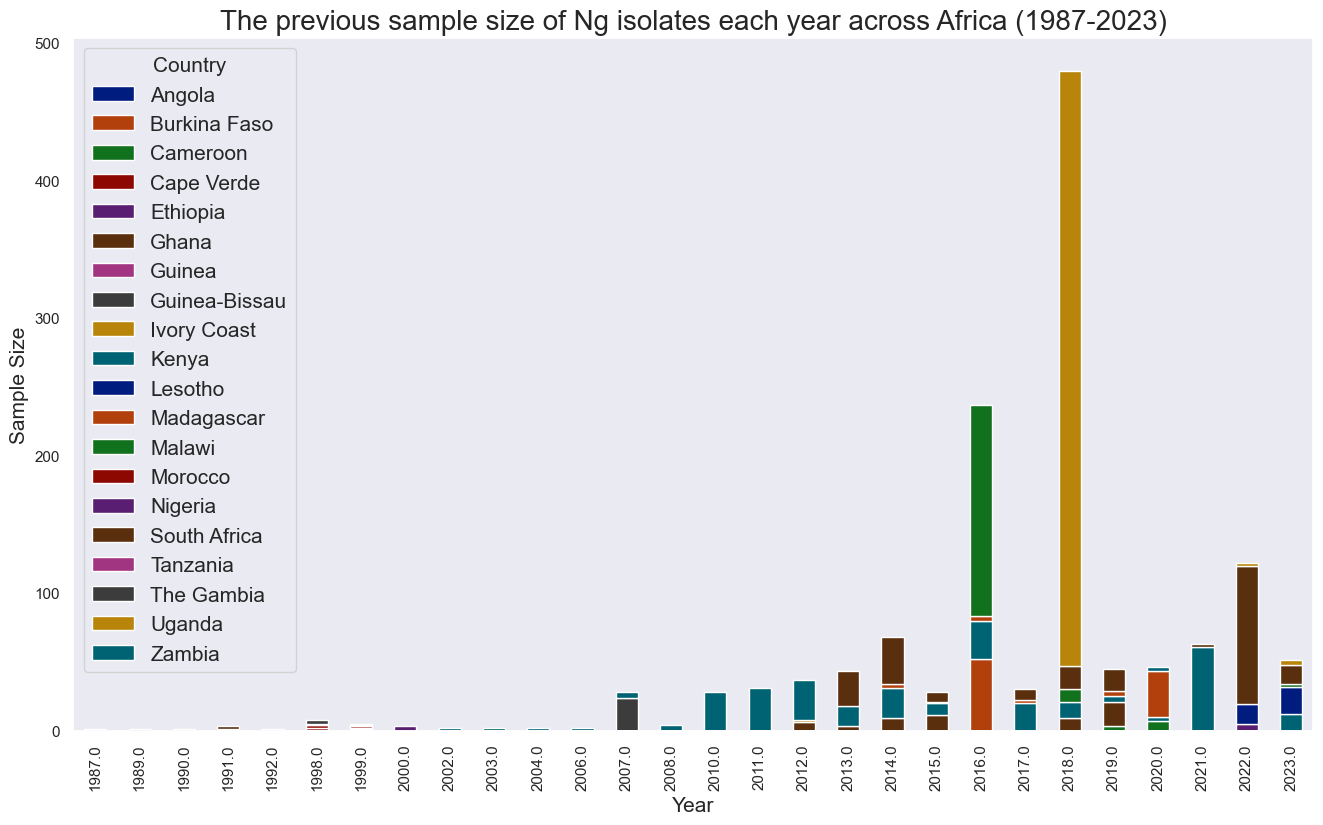

In [7]:
    # creating stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

pivot_df2.plot(kind = "bar", stacked = True, figsize = (16,9))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The previous sample size of Ng isolates each year across Africa (1987-2023)", fontsize = 20)
#plt.axhline(y = 100)
plt.legend(title = "Country", fontsize = 15, title_fontsize = 15)

plt.show()

This figure shows the isolate collection across Africa, excluding the isolates collected for this project's analysis. It's visible between the two graphs how much of an increase to the overall isolate collection the new South African samples gives.

In [8]:
    # replacing all NAs with 0
pivot_df.fillna(value = 0, inplace = True)    

    # calculating the cumulative sum along the years
cum_afr = pivot_df.cumsum(axis = 0)

print(cum_afr.loc[2023.0].sum())

2078.0


Note to self: Only 1416 isolates instead of 1886 because 470 isolates don't have country data.

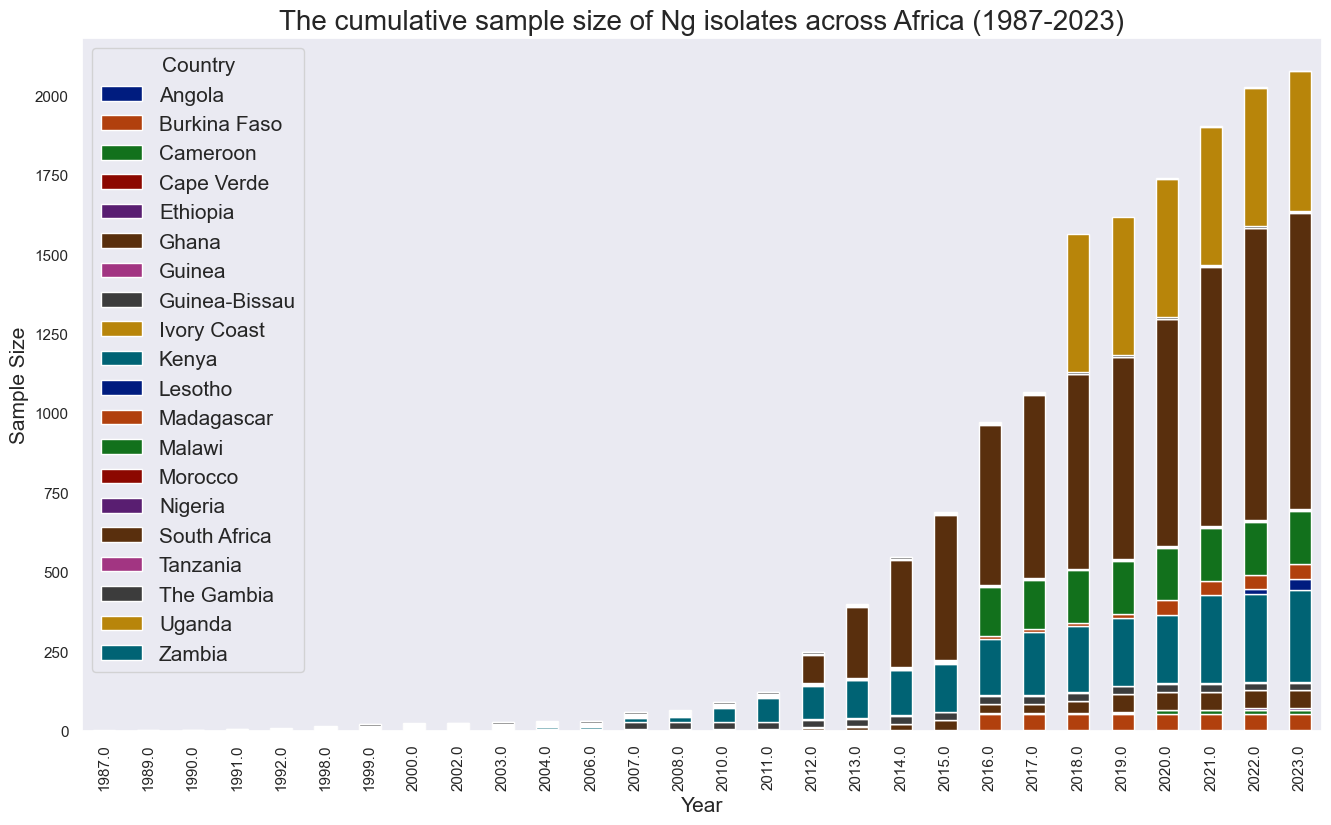

In [9]:
    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

cum_afr.plot(kind = "bar", stacked = True, figsize = (16,9))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The cumulative sample size of Ng isolates across Africa (1987-2023)", fontsize = 20)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


1372.0


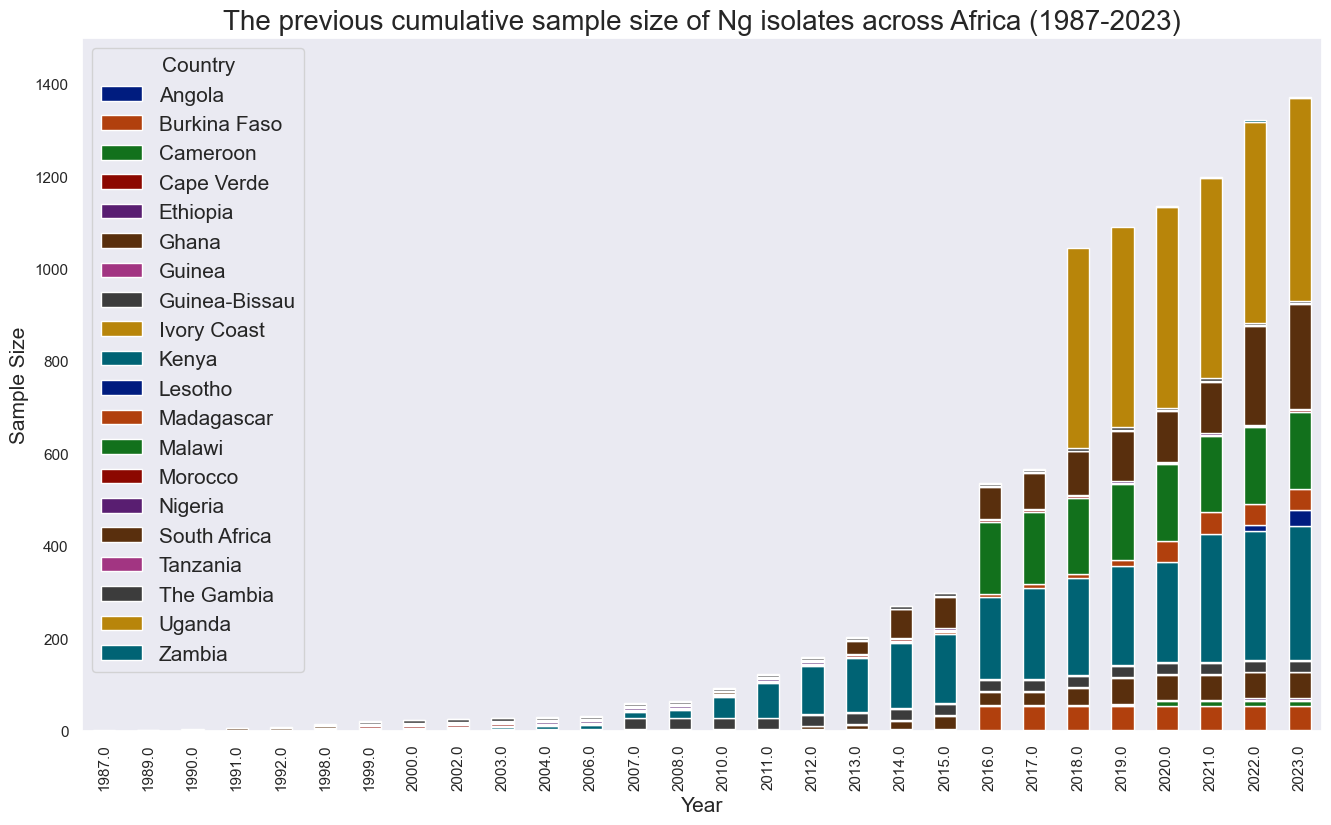

In [10]:
    # replacing all NAs with 0
pivot_df2.fillna(value = 0, inplace = True)    

    # calculating the cumulative sum along the years
cum_afr2 = pivot_df2.cumsum(axis = 0)

print(cum_afr2.loc[2023.0].sum())

    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

cum_afr2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0,1500))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The previous cumulative sample size of Ng isolates across Africa (1987-2023)", fontsize = 20)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


The two figures above reiterate the significant relative increase in isolate collection that this project works with. 

### Phenotypic AMR data

#### My South African collection


##### Previous antimicrobials

In [11]:
    # reading in MIC data for ciprofloxacin, penicillin and tetracycline
my_old_anitmicrobials: pd.DataFrame = pd.read_csv("Data/my_old_antimicrobials.csv", sep = ",", header = "infer")

    # filtering for ciprofloxacin
my_cipro_mic: pd.DataFrame = my_old_anitmicrobials.loc[:,["id", "isolate", "ciprofloxacin_mic"]]
    # filtering for penicillin
my_peni_mic: pd.DataFrame = my_old_anitmicrobials.loc[:,["id", "isolate", "penicillin_mic"]]
    # filtering for tetracycline
my_tet_mic: pd.DataFrame = my_old_anitmicrobials.loc[:,["id", "isolate", "tetracycline_mic"]]

    # removing NAs
my_cipro_mic_clean: pd.DataFrame = my_cipro_mic.dropna(subset = "ciprofloxacin_mic")
my_peni_mic_clean: pd.DataFrame = my_peni_mic.dropna(subset = "penicillin_mic")
my_tet_mic_clean: pd.DataFrame = my_tet_mic.dropna(subset = "tetracycline_mic")

    # finding the number of isolates with MIC data
print(f"{len(my_cipro_mic_clean)} isolate(s) have ciprofloxacin MIC data")
print(f"{len(my_peni_mic_clean)} isolate(s) have penicillin MIC data")
print(f"{len(my_tet_mic_clean)} isolate(s) have tetracycline MIC data")

    # extracting the min and max MIC of each antimicrobial
print(f"Ciprofloxacin: max = {np.max(my_cipro_mic_clean['ciprofloxacin_mic'])}; min = {np.min(my_cipro_mic_clean["ciprofloxacin_mic"])}")
print(f"Penicillin: max = {np.max(my_peni_mic_clean['penicillin_mic'])}; min = {np.min(my_peni_mic_clean["penicillin_mic"])}")
print(f"Tetracycline: max = {np.max(my_tet_mic_clean['tetracycline_mic'])}; min = {np.min(my_tet_mic_clean["tetracycline_mic"])}")

    # identifying the number of resistant isolates
print(f"{len(my_cipro_mic_clean[my_cipro_mic_clean["ciprofloxacin_mic"] > 0.06])} isolate(s) are resistant to ciprofloxacin")
print(f"{len(my_peni_mic_clean[my_peni_mic_clean["penicillin_mic"] > 1])} isolate(s) are resistant to penicillin")
print(f"{len(my_tet_mic_clean[my_tet_mic_clean["tetracycline_mic"] > 0.5])} isolate(s) are resistant to tetracycline")

274 isolate(s) have ciprofloxacin MIC data
160 isolate(s) have penicillin MIC data
161 isolate(s) have tetracycline MIC data
Ciprofloxacin: max = 32.0; min = 0.002
Penicillin: max = 256.0; min = 0.032
Tetracycline: max = 64.0; min = 0.064
214 isolate(s) are resistant to ciprofloxacin
102 isolate(s) are resistant to penicillin
145 isolate(s) are resistant to tetracycline


I have added MIC data for previously recommended antimicrobials, ciprofloxacin, penicillin and tetracycline, and identified the number of isolates in the collection resistant to each.

##### Azithromycin

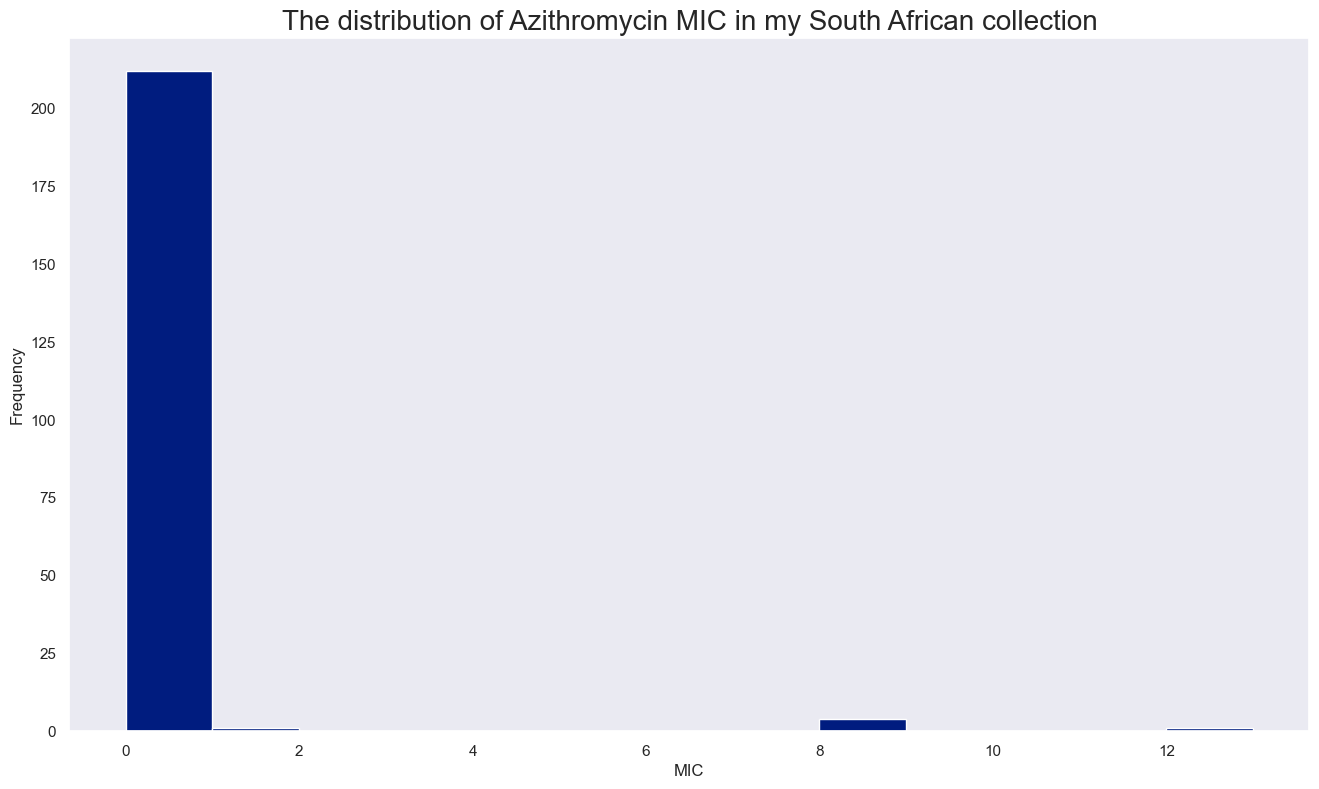

In [12]:
    # importing MIC data
my_amr_mic: pd.DataFrame = pd.read_csv("Data/my_amr_mic.csv", sep = ",", header = "infer")

    # cleaning function
Functions.clean(df = my_amr_mic, rename_cols = {"azithromycin_mic": "azi_mic", "cefixime_mic": "cef_mic", "ceftriaxone_mic": "ceftri_mic"}, replace_val = {"Gauteng": "Gauteng Province", "KwaZulu Natal": "Kwazulu-Natal", "KwaZulu-Natal": "Kwazulu-Natal"})

    
    # filtering for azithromycin data
my_azi: pd.DataFrame = pd.DataFrame(my_amr_mic["azi_mic"])
    # removing rows with missing data
my_azi_clean: pd.DataFrame = my_azi.dropna(axis = 0, how = "any")


    # plotting the distribution of azithromycin MIC
fig = plt.figure(figsize = (16,9))

plt.hist(data = my_azi_clean, x = "azi_mic", bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

plt.title("The distribution of Azithromycin MIC in my South African collection", fontsize = 20)
plt.xlabel("MIC")
plt.ylabel("Frequency")

plt.show()


Here, I imported Azithromycin MIC data for my South African isolates and plotted their MICs in a histogram. To determine "resistant" strains, I will use the EUCAST epidemiological cut-off value (ECOFF) 1 mg/L (> 1). The majority of isolates with MIC data have an MIC <= 1, but some have an MIC beyond that which may indicate resistance.

In [13]:
    # parsing out the strains with an MIC > ECOFF
my_azi_res: pd.DataFrame = my_azi_clean.loc[my_azi_clean["azi_mic"] > 1]

print(f"There are {len(my_azi_res)} isolates that are resistant to Azithromycin")
#my_azi_res


There are 5 isolates that are resistant to Azithromycin


I have created a new DataFrame containing the isolates with an MIC > 1 mg/L. I will investigate this in "Genotypic & Phenotypic AMR links".

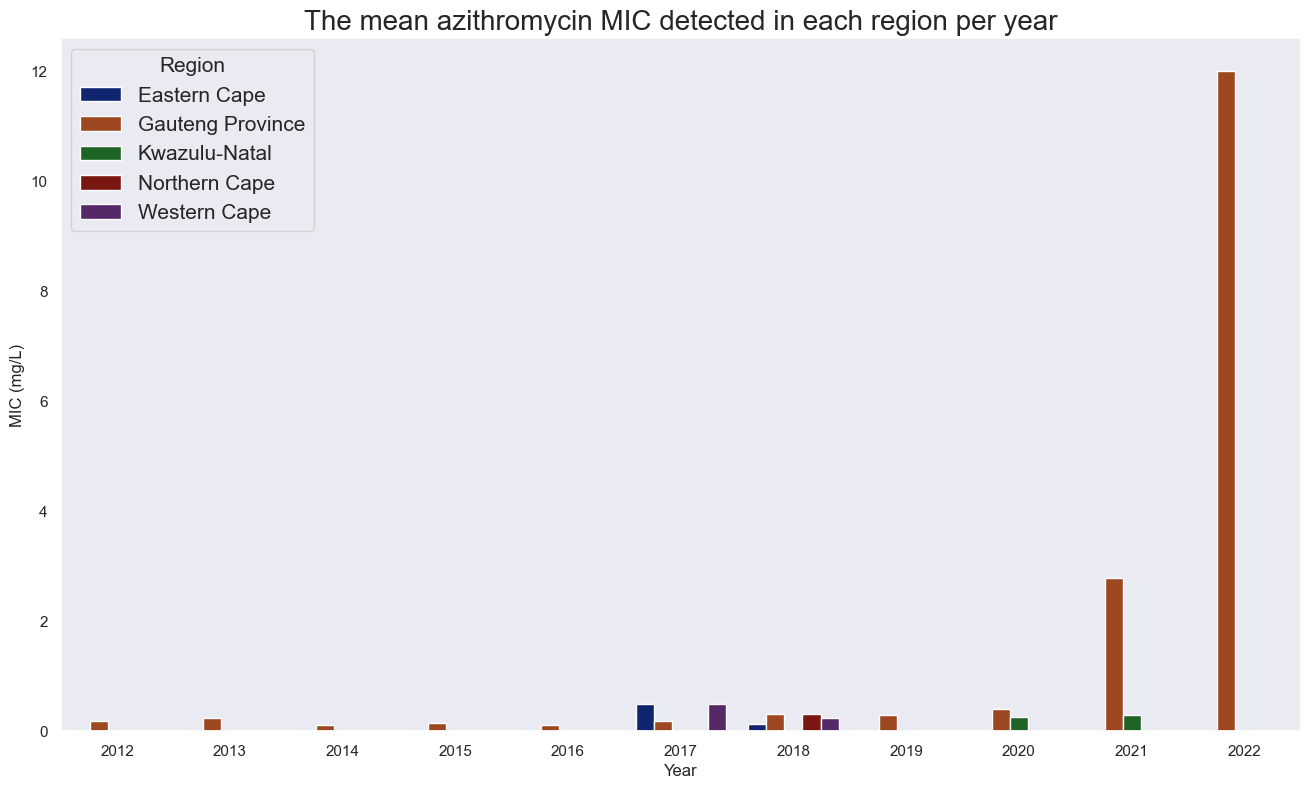

In [14]:
    # filtering for azithromycin MIC data 
my_azi_mic: pd.DataFrame = my_amr_mic.drop(columns = ["cef_mic", "ceftri_mic"])

    # removing rows without MIC data
my_azi_mic_clean: pd.DataFrame = my_azi_mic.dropna(subset = "azi_mic")

    # creating a pivot table
my_azi_pivot: pd.DataFrame = my_azi_mic_clean.pivot_table(index = "year", columns = "region", values = "azi_mic", aggfunc = "mean")


    # melting the pivot table
my_azi_melt: pd.DataFrame = my_azi_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "azi_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_azi_melt, x = "year", y = "azi_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean azithromycin MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()



I created a DataFrame that contains data on Azithromycin MIC for each year & region sampled in my South African collection. The above bar graph shows this data, with the mean MIC each year for each region. 2021 and 2022 show a significant increase in Azithromycin MIC: 2021 had 4 isolates with an MIC of 8 and 2022 had one isolate with an MIC of 12. This is a concerning discovery and will be investigated later on.

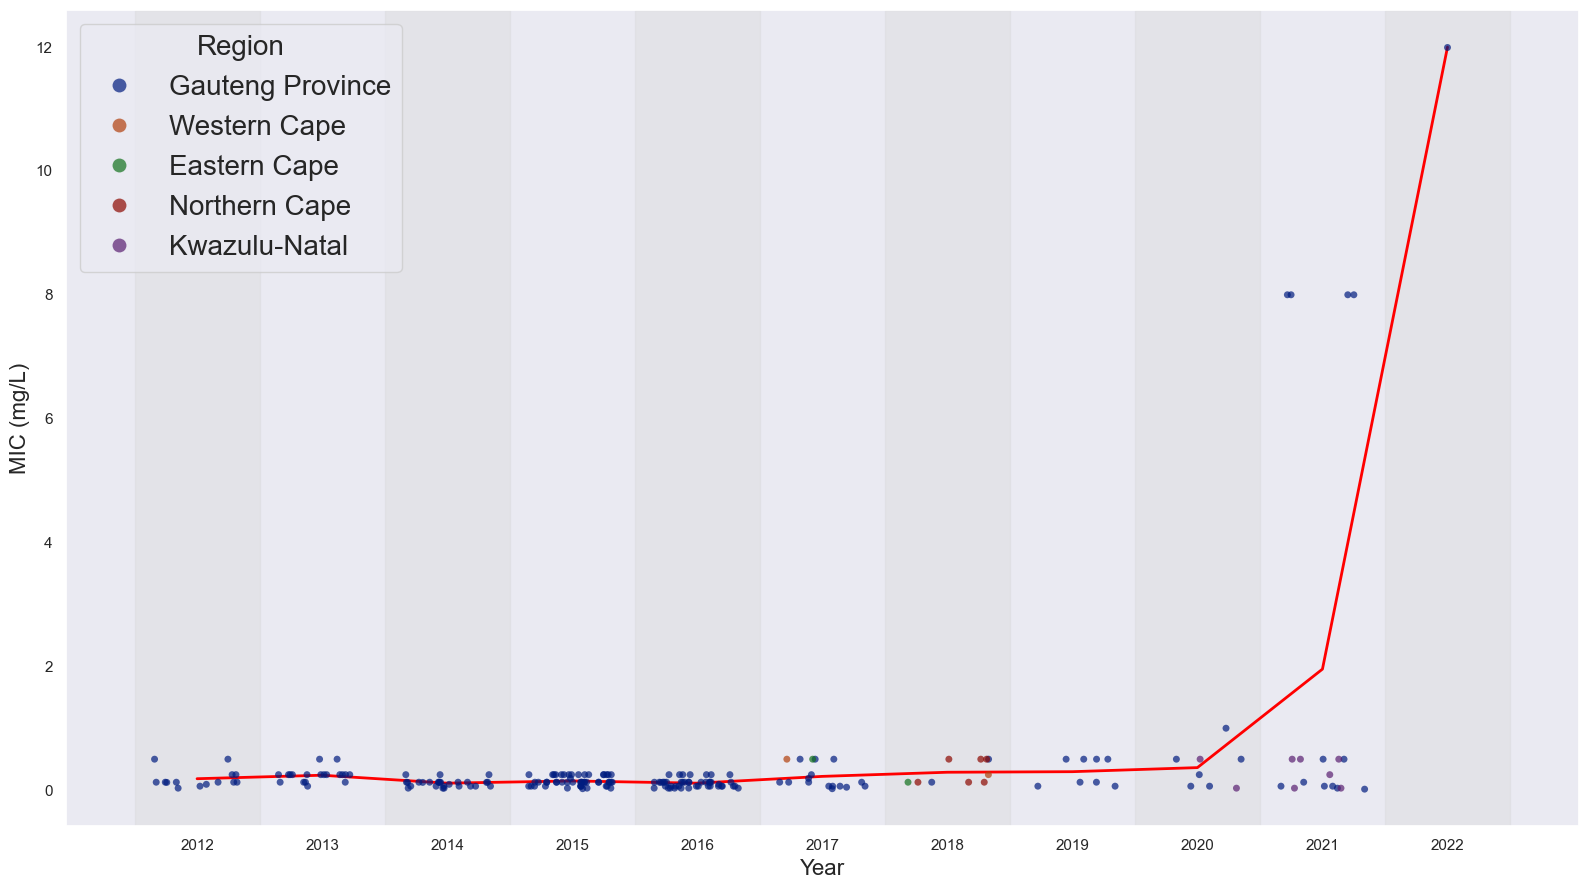

In [15]:
    # replacing NaNs in "region" columns
my_azi_mic_clean.loc[:, "region"] = my_azi_mic_clean["region"].fillna("NA")

    # extracting the mean azithromycin MIC each year 
mean_azi_mic: pd.Series = my_azi_mic_clean.groupby("year")["azi_mic"].mean().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_azi_mic_clean
mean_azi_mic["year"] = pd.Categorical(values = mean_azi_mic["year"], categories = my_azi_mic_clean["year"].unique(), ordered = True)


    # setting a random seed
np.random.seed(12)    

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_azi_mic_clean, x = "year", y = "azi_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
#plt.plot(mean_azi_mic["year"].cat.codes, mean_azi_mic["azi_mic"], color="red", linewidth=2, label="Mean MIC")


    # extracting unique years
unique_years = my_azi_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
#plt.title("Azithromycin MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("MIC (mg/L)", fontsize = 16)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)


plt.plot(mean_azi_mic["year"].cat.codes, mean_azi_mic["azi_mic"], color="red", linewidth=2, label="Mean MIC")

plt.show()


This figure also shows Azithromycin MIC data for my South African sample, however by using a strip plot, the distribution of the data is much clearer. The large spike in MIC is only caused by 4 strains in 2021 and 1 strain in 2022. This could suggest the early emergence of a big AMR problem.

In [16]:
    # extracting the AZM MIC range of all isolates
print(f"{len(my_azi_mic_clean)} isolate(s) have AZM MIC data - Min: {np.min(my_azi_mic_clean["azi_mic"])} Max: {np.max(my_azi_mic_clean["azi_mic"])}")

    # filtering for susceptible isolates
my_azi_sus: pd.DataFrame = my_azi_mic_clean[my_azi_mic_clean["azi_mic"] <= 0.25]

    # extracting the AZM MIC range of susceptible isolates
print(f"{len(my_azi_sus)} isolate(s) are susceptible to Azithromycin - Min: {np.min(my_azi_sus["azi_mic"])} Max: {np.max(my_azi_sus["azi_mic"])}")

    # filtering for isolates with reduced susceptibility
my_azi_low_sus: pd.DataFrame = my_azi_mic_clean[(my_azi_mic_clean["azi_mic"] <= 1) & (my_azi_mic_clean["azi_mic"] > 0.25)]

    # # extracting the AZM MIC range of isolates with reduced susceptibility
print(f"{len(my_azi_low_sus)} isolate(s) have low susceptibility to Azithromycin - Min: {np.min(my_azi_low_sus["azi_mic"])} Max: {np.max(my_azi_low_sus["azi_mic"])}")


218 isolate(s) have AZM MIC data - Min: 0.016 Max: 12.0
187 isolate(s) are susceptible to Azithromycin - Min: 0.016 Max: 0.25
26 isolate(s) have low susceptibility to Azithromycin - Min: 0.5 Max: 1.0


I have extracted the AZM MIC range of (i) all isolates, (ii) susceptible isolates and (iii) isolates with reduced susceptibility.

##### Cefixime

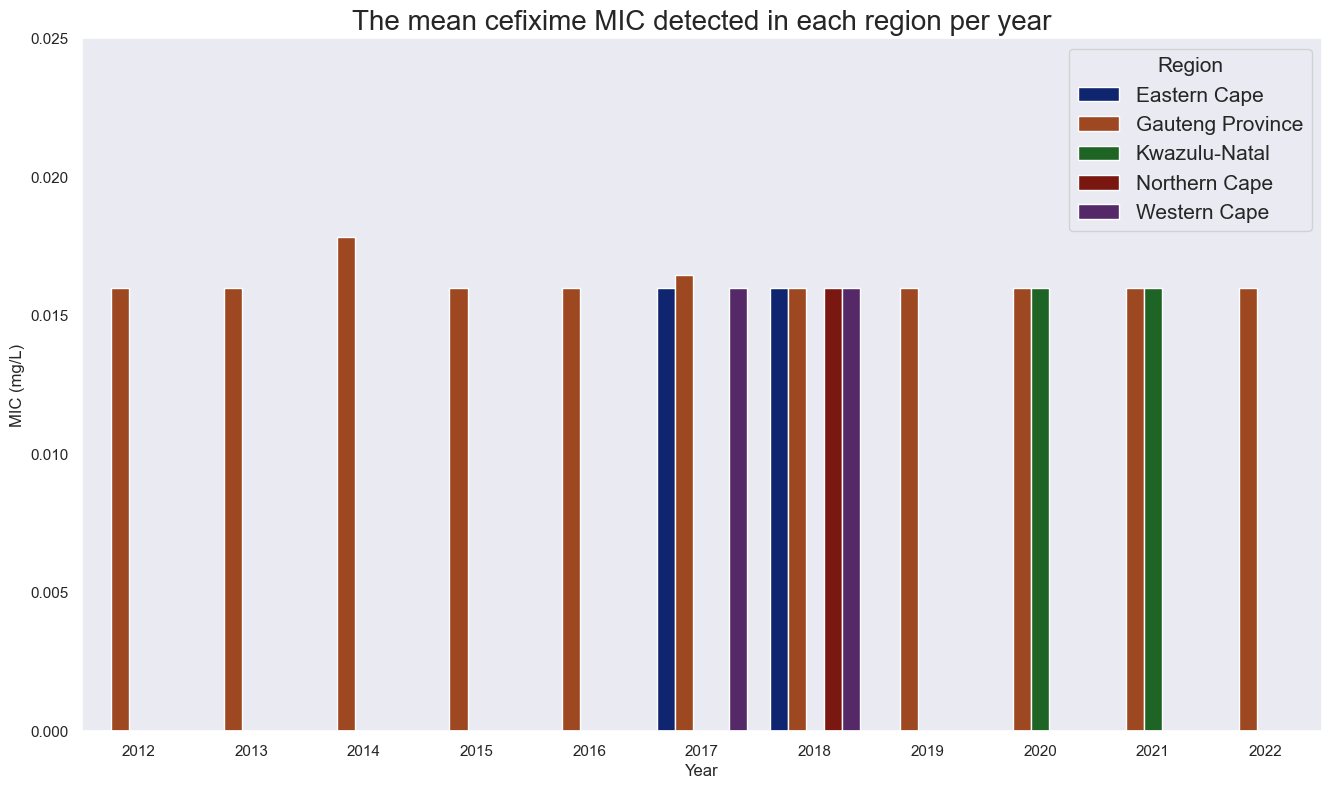

In [17]:
    # filtering for cefixime...
my_cef_mic: pd.DataFrame = my_amr_mic.drop(columns = ["azi_mic", "ceftri_mic"])

    # removing rows without MIC data
my_cef_mic_clean: pd.DataFrame = my_cef_mic.dropna(subset = "cef_mic")

    # creating a pivot table
my_cef_pivot: pd.DataFrame = my_cef_mic_clean.pivot_table(index = "year", columns = "region", values = "cef_mic", aggfunc = "mean")


    # melting the pivot table
my_cef_melt: pd.DataFrame = my_cef_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "cef_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_cef_melt, x = "year", y = "cef_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.ylim(0, 0.025)
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean cefixime MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()


Same process as before, but with Cefixime MIC. The figure shows a very consistent mean MIC throughout the years and in each region.

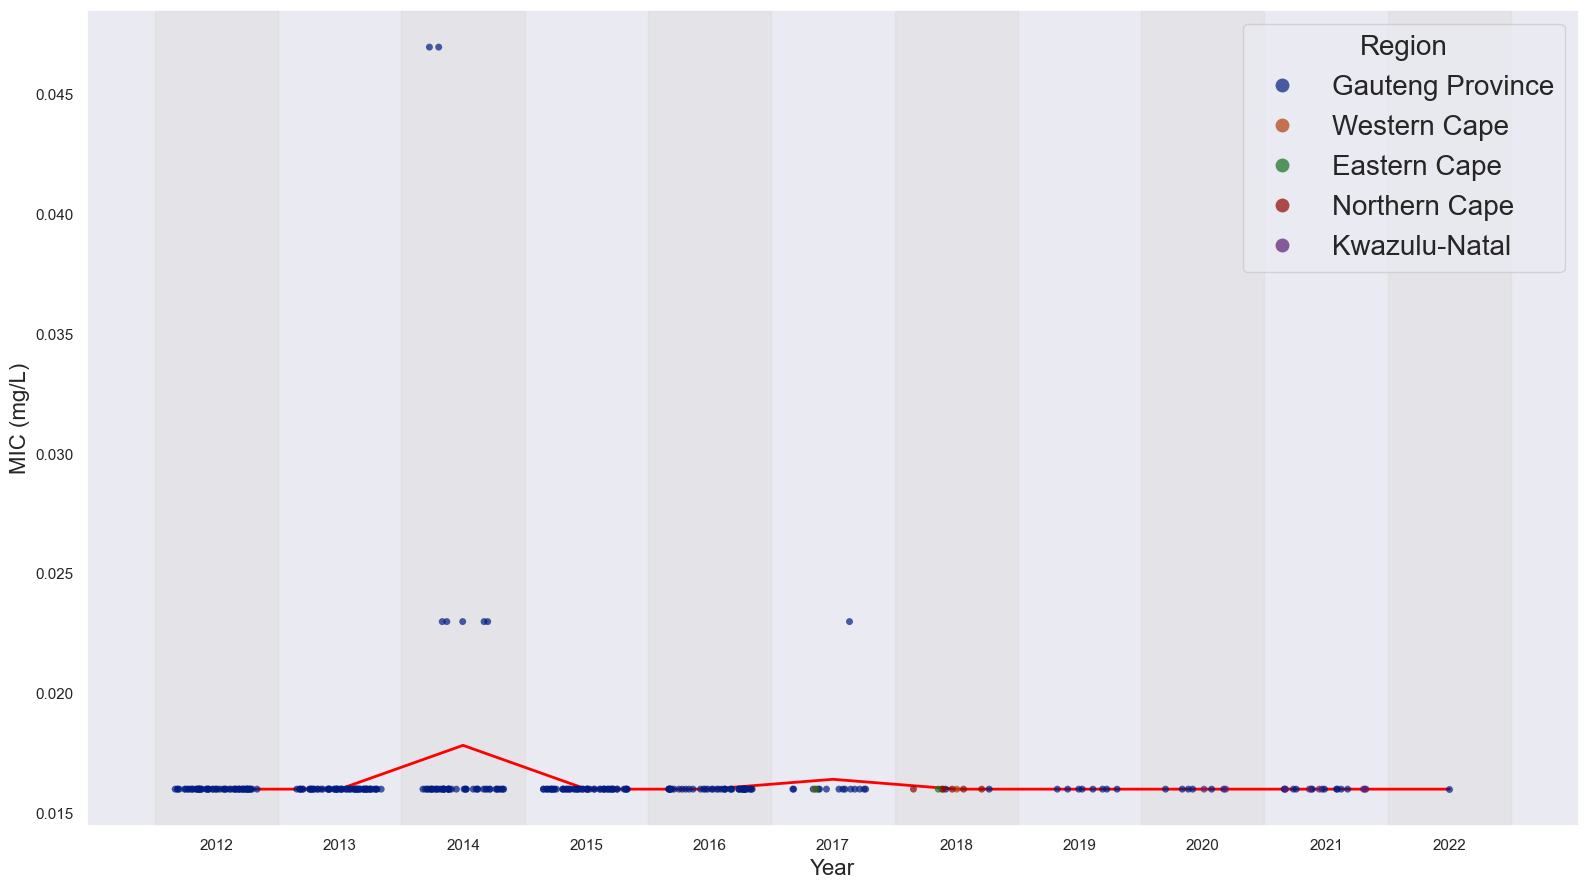

In [18]:
    # replacing NaNs in "region" columns
my_cef_mic_clean.loc[:, "region"] = my_cef_mic_clean["region"].fillna("NA")

    # extracting the mean cefixime MIC each year 
mean_cef_mic: pd.Series = my_cef_mic_clean.groupby("year")["cef_mic"].mean().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_cef_mic_clean
mean_cef_mic["year"] = pd.Categorical(values = mean_cef_mic["year"], categories = my_cef_mic_clean["year"].unique(), ordered = True)

    # setting a random seed
np.random.seed(21)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_cef_mic_clean, x = "year", y = "cef_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
#plt.plot(mean_cef_mic["year"].cat.codes, mean_cef_mic["cef_mic"], color="red", linewidth=2, label="Mean MIC per year")


    # extracting unique years
unique_years2 = my_cef_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years2):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
#plt.title("Cefixime MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("MIC (mg/L)", fontsize = 16)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.plot(mean_cef_mic["year"].cat.codes, mean_cef_mic["cef_mic"], color="red", linewidth=2, label="Mean MIC per year")

plt.show()


Now looking at the distribution of cefixime MIC in my South African sample, there are a few outlying MIC values. However, with the EUCAST cefixime breakpoint value being 0.125 mg/L, the ng population is still susceptible to the antimicrobial.

In [19]:
    # extracting the CFM MIC range of all isolates
print(f"{len(my_cef_mic_clean)} isolate(s) have CFM MIC data")

my_cef_sus: pd.DataFrame = my_cef_mic_clean[my_cef_mic_clean["cef_mic"] <= 0.125]

print(f"{len(my_cef_sus)} isolate(s) are susceptible to Cefixime - Min: {np.min(my_cef_sus["cef_mic"])} Max: {np.max(my_cef_sus["cef_mic"])}")


340 isolate(s) have CFM MIC data
340 isolate(s) are susceptible to Cefixime - Min: 0.016 Max: 0.047


There are no isolates in the South African collection that are resistant to Cefixime.

##### Ceftriaxone

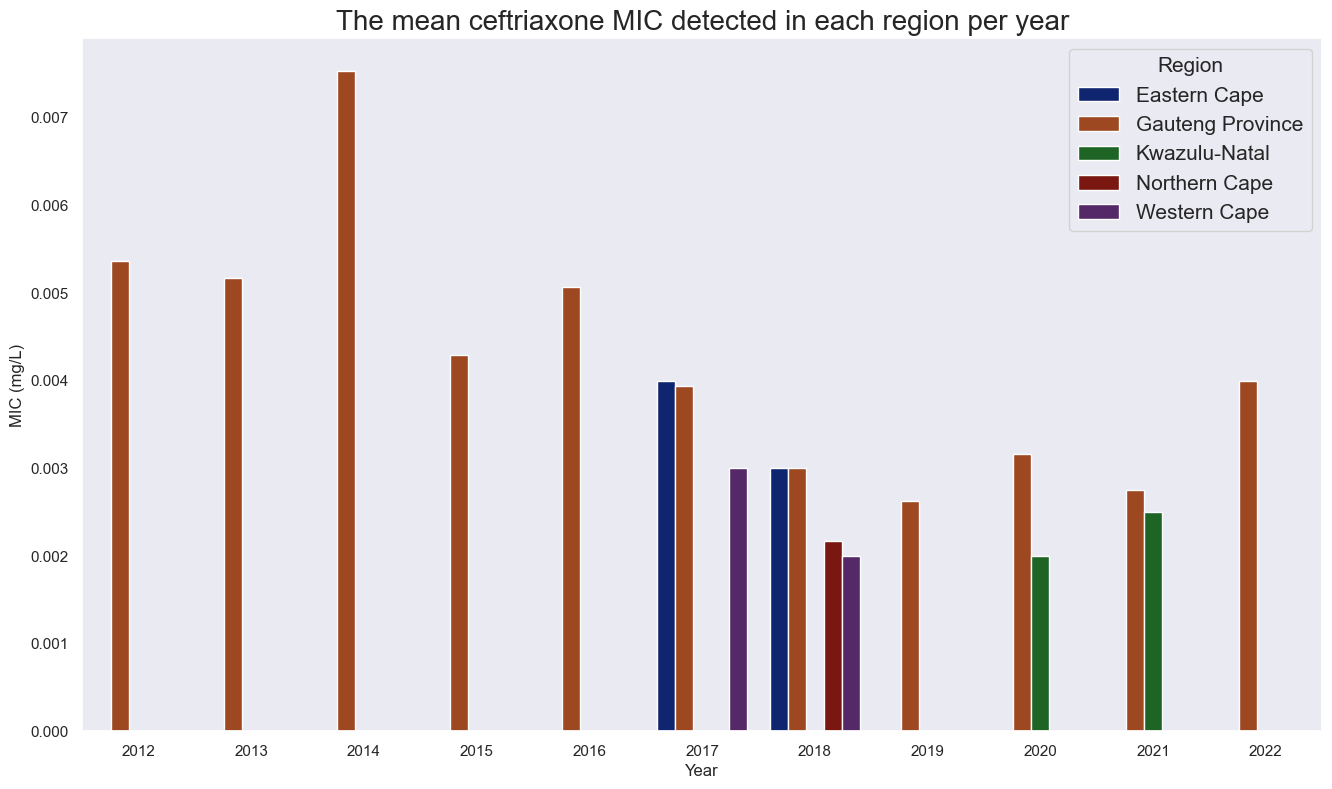

In [20]:
    # filtering for ceftriaxone... 
my_ceftri_mic: pd.DataFrame = my_amr_mic.drop(columns = ["azi_mic", "cef_mic"])

    # removing rows without MIC data
my_ceftri_mic_clean: pd.DataFrame = my_ceftri_mic.dropna(subset = "ceftri_mic")

    # creating a pivot table
my_ceftri_pivot: pd.DataFrame = my_ceftri_mic_clean.pivot_table(index = "year", columns = "region", values = "ceftri_mic", aggfunc = "mean")


    # melting the pivot table
my_ceftri_melt: pd.DataFrame = my_ceftri_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "ceftri_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_ceftri_melt, x = "year", y = "ceftri_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean ceftriaxone MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()



Same process as before, but with Ceftriaxone MIC. The figure shows a very interesting sigmoidal pattern in Ceftriaxone MIC. Although the largest mean MIC is < 0.007 mg/L (2014), ceftriaxone MIC appears to be rising again, which needs to be investigated. 


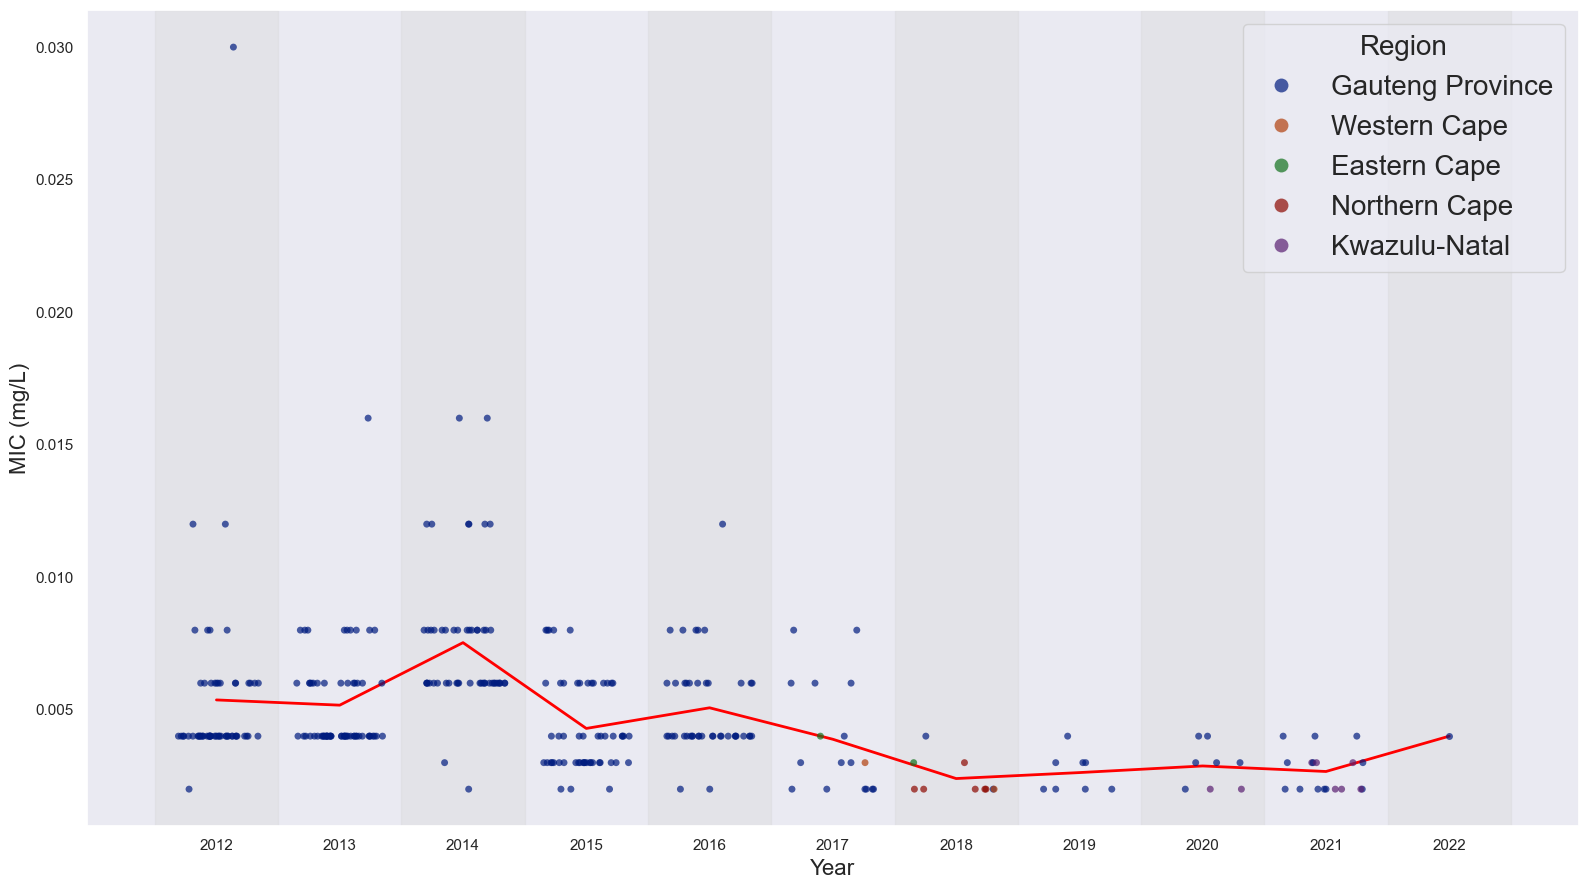

In [21]:
    # replacing NaNs in "region" columns
my_ceftri_mic_clean.loc[:, "region"] = my_ceftri_mic_clean["region"].fillna("NA")    
    
    # extracting the mean ceftriaxone MIC each year 
mean_ceftri_mic: pd.Series = my_ceftri_mic_clean.groupby("year")["ceftri_mic"].mean().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_ceftri_mic_clean
mean_ceftri_mic["year"] = pd.Categorical(values = mean_ceftri_mic["year"], categories = my_ceftri_mic_clean["year"].unique(), ordered = True)


    # setting a random seed
np.random.seed(123)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_ceftri_mic_clean, x = "year", y = "ceftri_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
#plt.plot(mean_ceftri_mic["year"].cat.codes, mean_ceftri_mic["ceftri_mic"], color="red", linewidth=2, label="Mean MIC per year")


    # extracting unique years
unique_years3 = my_ceftri_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years3):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
#plt.title("Ceftriaxone MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("MIC (mg/L)", fontsize = 16)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.plot(mean_ceftri_mic["year"].cat.codes, mean_ceftri_mic["ceftri_mic"], color="red", linewidth=2, label="Mean MIC per year")

plt.show()


Once looking at the distribution of MIC values, the sigmoidal pattern is lost and can be explained by the small sample size in later years. With only 1 MIC value recorded for 2022, the mean MIC is equal to that value, which leads to the impression of a climb in MIC. Nevertheless, there is evidently a decline between 2012-2018 in the max MIC values observed, which is still a point of interest. Furthermore, with a EUGASP ciprofloxacin breakpoint of 0.125 (mg/L), the population is still very susceptible.

In [22]:
    # extracting the CRO MIC range of all isolates
print(f"{len(my_ceftri_mic_clean)} isolate(s) have CRO MIC data")

my_ceftri_sus: pd.DataFrame = my_ceftri_mic_clean[my_ceftri_mic_clean["ceftri_mic"] <= 0.125]

print(f"{len(my_ceftri_sus)} isolate(s) are susceptible to Ceftriaxone - Min: {np.min(my_ceftri_sus["ceftri_mic"])} Max: {np.max(my_ceftri_sus["ceftri_mic"])}")


338 isolate(s) have CRO MIC data
338 isolate(s) are susceptible to Ceftriaxone - Min: 0.002 Max: 0.03


No isolates in the South African collection are resistant to Ceftriaxone

#### Other South African collections


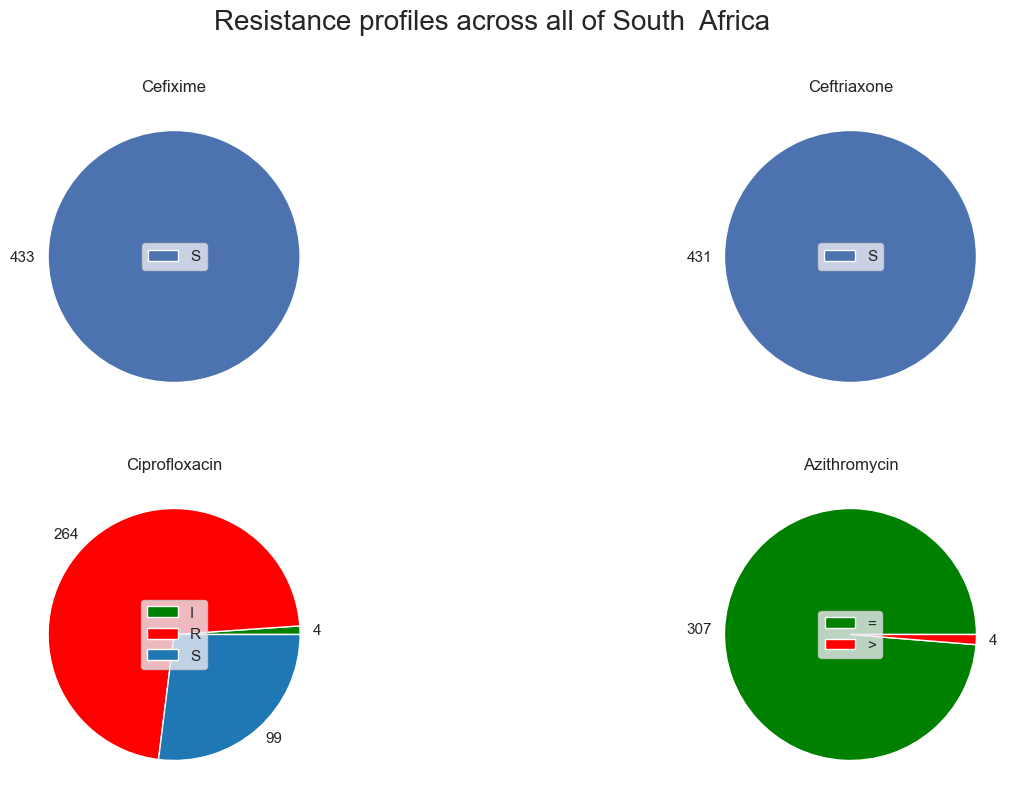

In [23]:
    # Same set of operations for phenotypic AMR data for the whole of South Africa, including my data
    
    # importing...
sa_amr: pd.DataFrame = pd.read_csv("Data/sa_amr_prof.csv", sep = ",", header = "infer")
#sa_amr.head()

    # renaming columns...
sa_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#sa_amr.head()

    # separating data by antimicrobial...
sa_azi = sa_amr.azi_sign.dropna(axis = 0, how = "any")
sa_cef = sa_amr.cef_sir.dropna(axis = 0, how = "any")
sa_ceftri = sa_amr.ceftri_sir.dropna(axis = 0, how = "any")
sa_cipro = sa_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting frequency of S/I/R or </=/>...
amr_azi2 = sa_azi.groupby(sa_azi).count()
#print(amr_azi2)

amr_cef2 = sa_cef.groupby(sa_cef).count()
#print(amr_cef2)

amr_ceftri2 = sa_ceftri.groupby(sa_ceftri).count()
#print(amr_ceftri2)

amr_cipro2 = sa_cipro.groupby(sa_cipro).count()
#print(amr_cipro2)


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # cefixime
Functions.pie(data = amr_cef2, title = "Cefixime", ax = ax[0,0])

    # ceftriaxone
Functions.pie(data = amr_ceftri2, title = "Ceftriaxone", ax = ax[0,1])

    # ciprofloxacin
Functions.pie(data = amr_cipro2, title = "Ciprofloxacin", ax = ax[1,0],   colors = ["green", "red", "#1f77b4"])

    # azithromycin
Functions.pie(data = amr_azi2, title = "Azithromycin", ax = ax[1,1], colors = ["green", "red"])

    # adding a title to the figure
fig.suptitle("Resistance profiles across all of South  Africa", fontsize = 20)

plt.show()


This figure depicts the same type of information as the above figure, however represents *all* South African isolates available on PubMLST.

##### MIC through time

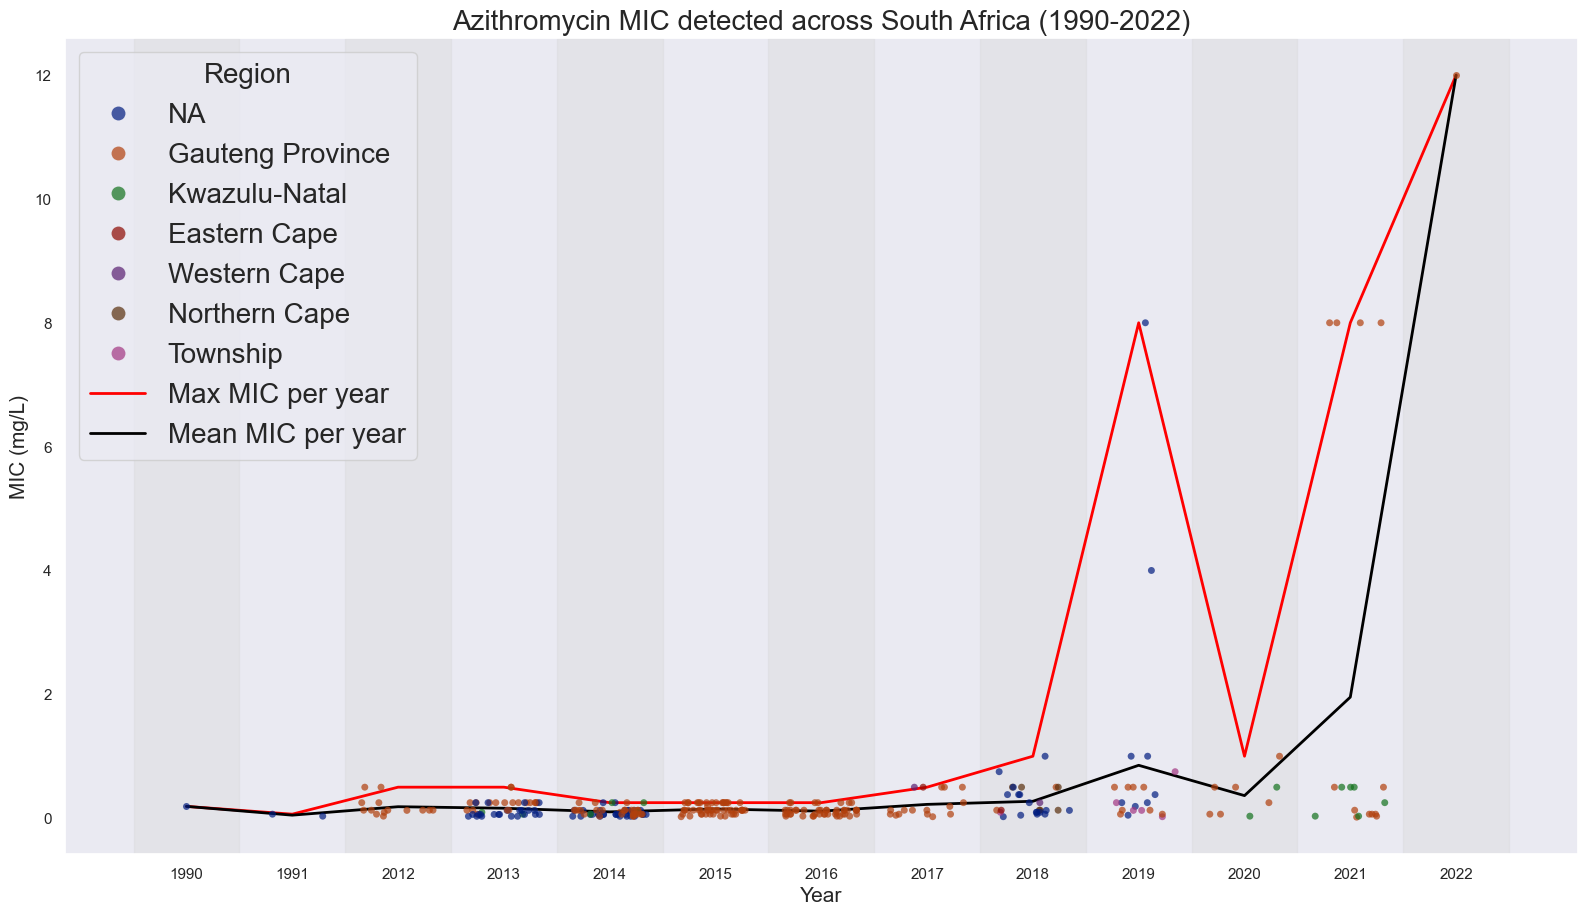

In [24]:
    # importing MIC data
sa_amr_mic: pd.DataFrame = pd.read_csv("Data/sa_amr_mic.csv", sep = ",", header = "infer")

    # cleaning function
Functions.clean(df = sa_amr_mic, rename_cols = {"azithromycin_mic": "azi_mic", "cefixime_mic": "cef_mic", "ceftriaxone_mic": "ceftri_mic"}, replace_val = {"Gauteng": "Gauteng Province", "KwaZulu Natal": "Kwazulu-Natal", "KwaZulu-Natal": "Kwazulu-Natal"})

    
    # filtering for azithromycin MIC data 
sa_azi_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["cef_mic", "ceftri_mic"])

    # removing rows without MIC data
sa_azi_mic_clean: pd.DataFrame = sa_azi_mic.dropna(subset = "azi_mic")

    # replacing NaNs in "region" columns
sa_azi_mic_clean.loc[:, "region"] = sa_azi_mic_clean["region"].fillna("NA")


    # extracting the maximum azithromycin MIC each year 
sa_max_azi_mic: pd.Series = sa_azi_mic_clean.groupby("year")["azi_mic"].max().reset_index()

    # extracting the mean azithromycin MIC each year
sa_mean_azi_mic: pd.Series = sa_azi_mic_clean.groupby("year")["azi_mic"].mean().reset_index()


    # ordering by year in sa_azi_mic_clean
sa_azi_mic_clean = sa_azi_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_azi_mic_clean
sa_max_azi_mic["year"] = pd.Categorical(values = sa_max_azi_mic["year"], categories = sa_azi_mic_clean["year"].unique(), ordered = True)

sa_mean_azi_mic["year"] = pd.Categorical(values = sa_mean_azi_mic["year"], categories = sa_azi_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_azi_mic_clean["year"] = sa_azi_mic_clean["year"].astype(int)


    # setting a random seed
np.random.seed(212)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_azi_mic_clean, x = "year", y = "azi_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_azi_mic["year"].cat.codes, sa_max_azi_mic["azi_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_azi_mic["year"].cat.codes, sa_mean_azi_mic["azi_mic"], color="black", linewidth=2, label="Mean MIC per year")

    # extracting unique years
sa_unique_years = sa_azi_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Azithromycin MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot for Azithromycin MIC through time across the whole of South Africa. There appears to be an emergence of AMR to Azithromycin, with a few isolates displaying disproportionately high MICs that are well above the EUCAST ECOFF of 1 mg/L. With the greatest MIC (12 mg/L) being observed in 2022, this is a concerning pattern.

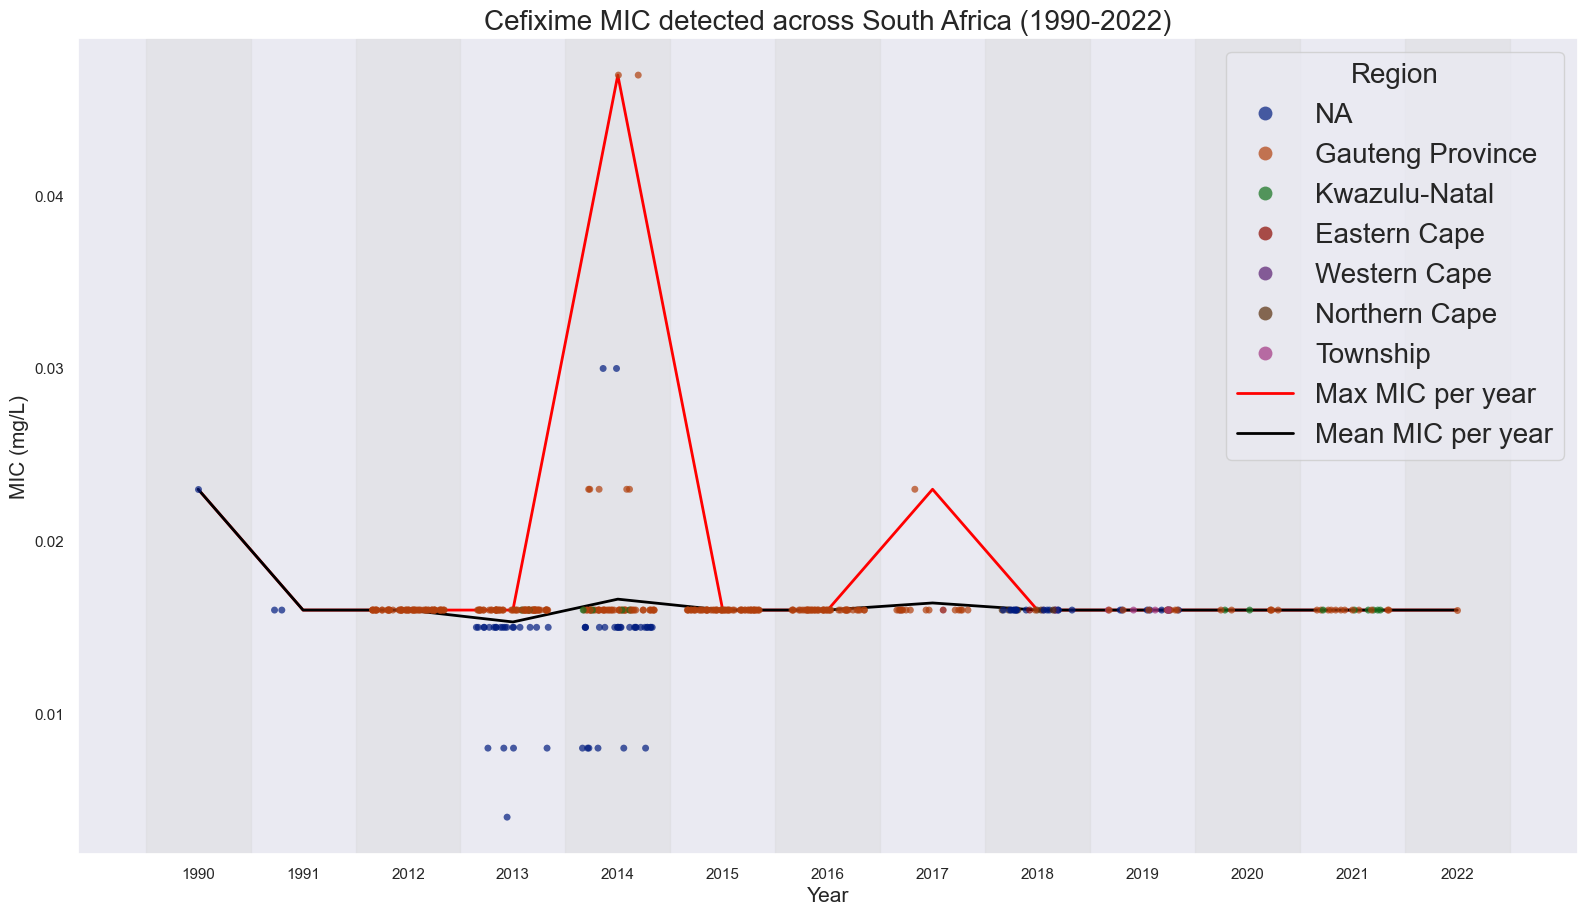

In [25]:
    # filtering for cefixime MIC data 
sa_cef_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["azi_mic", "ceftri_mic"])

    # removing rows without MIC data
sa_cef_mic_clean: pd.DataFrame = sa_cef_mic.dropna(subset = "cef_mic")

    # replacing NaNs in "region" columns
sa_cef_mic_clean.loc[:, "region"] = sa_cef_mic_clean["region"].fillna("NA")


    # extracting the maximum cefixime MIC each year 
sa_max_cef_mic: pd.Series = sa_cef_mic_clean.groupby("year")["cef_mic"].max().reset_index()
 
    # extracting the mean cefixime MIC each year
sa_mean_cef_mic: pd.Series = sa_cef_mic_clean.groupby("year")["cef_mic"].mean().reset_index()


    # ordering by year in sa_cef_mic_clean
sa_cef_mic_clean = sa_cef_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_cef_mic_clean
sa_max_cef_mic["year"] = pd.Categorical(values = sa_max_cef_mic["year"], categories = sa_cef_mic_clean["year"].unique(), ordered = True)

sa_mean_cef_mic["year"] = pd.Categorical(values = sa_mean_cef_mic["year"], categories = sa_cef_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_cef_mic_clean["year"] = sa_cef_mic_clean["year"].astype(int)


    # setting the random seed
np.random.seed(121)    
    
    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_cef_mic_clean, x = "year", y = "cef_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_cef_mic["year"].cat.codes, sa_max_cef_mic["cef_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_cef_mic["year"].cat.codes, sa_mean_cef_mic["cef_mic"], color="black", linewidth=2, label="Mean MIC per year")


    # extracting unique years
sa_unique_years2 = sa_cef_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years2):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Cefixime MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot of cefixime MIC through time across the whole of South Africa. For the most part, MIC has been very stable and at low levels. There are a few isolates (2014 & 2017) that display a higher MIC than the average isolate, however they are still well below the EUCAST breakpoint of 0.125 mg/L so aren't of much concern. 

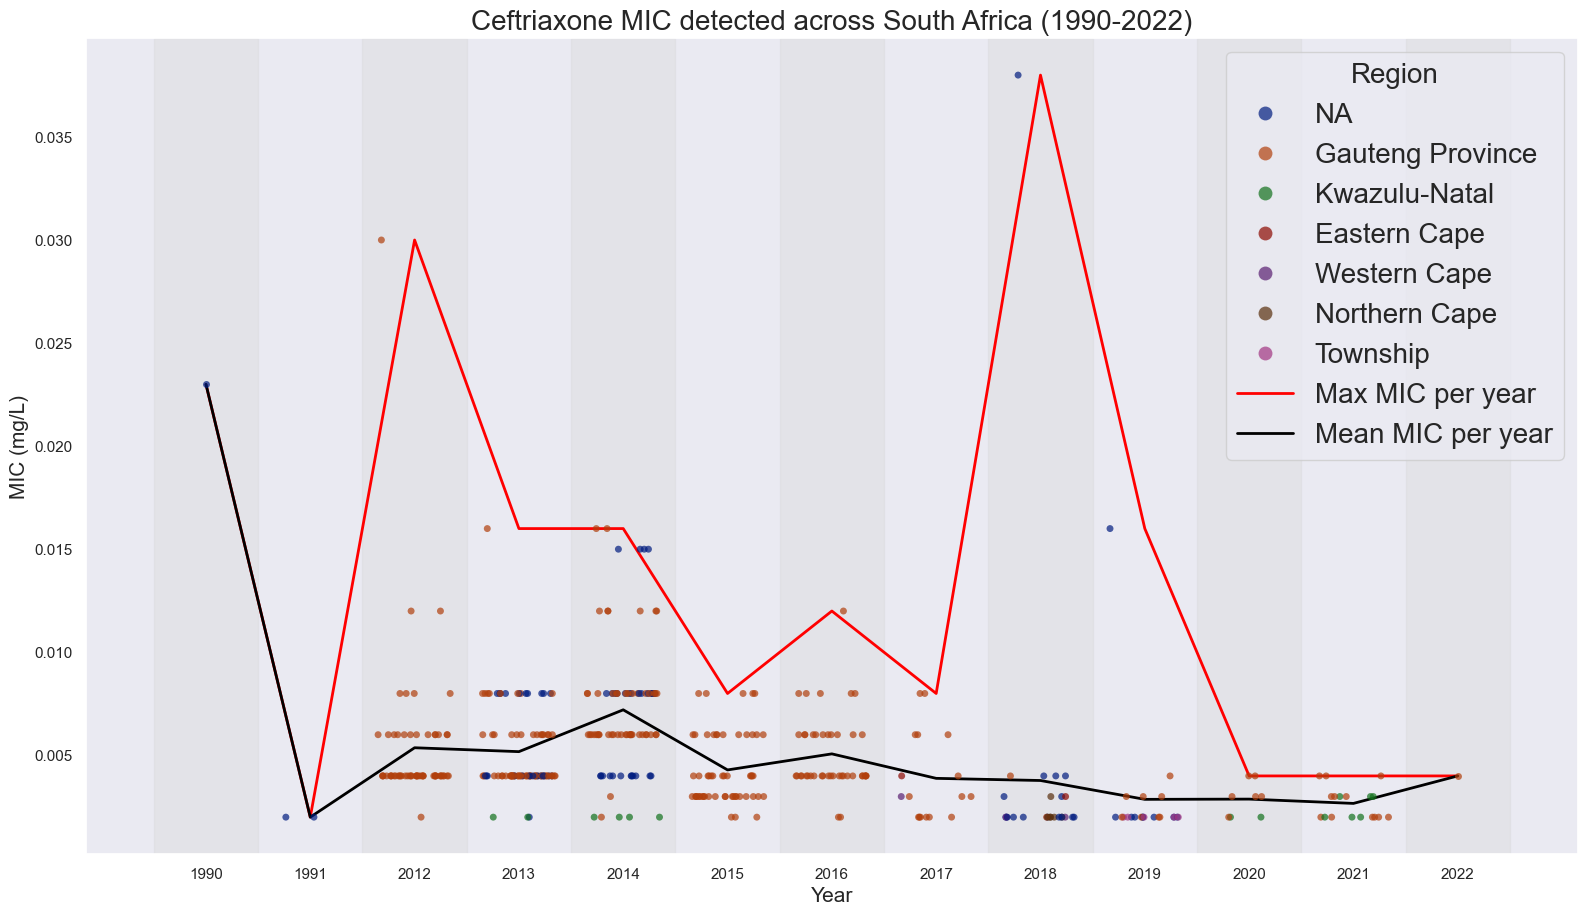

In [26]:
    # filtering for ceftriaxone MIC data 
sa_ceftri_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["azi_mic", "cef_mic"])

    # removing rows without MIC data
sa_ceftri_mic_clean: pd.DataFrame = sa_ceftri_mic.dropna(subset = "ceftri_mic")

    # replacing NaNs in "region" columns
sa_ceftri_mic_clean.loc[:, "region"] = sa_ceftri_mic_clean["region"].fillna("NA")


    # extracting the maximum ceftriaxone MIC each year 
sa_max_ceftri_mic: pd.Series = sa_ceftri_mic_clean.groupby("year")["ceftri_mic"].max().reset_index()

    # extracting the mean ceftriaxone MIC each year
sa_mean_ceftri_mic: pd.Series = sa_ceftri_mic_clean.groupby("year")["ceftri_mic"].mean().reset_index()


    # ordering by year in sa_ceftri_mic_clean
sa_ceftri_mic_clean = sa_ceftri_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_ceftri_mic_clean
sa_max_ceftri_mic["year"] = pd.Categorical(values = sa_max_ceftri_mic["year"], categories = sa_ceftri_mic_clean["year"].unique(), ordered = True)

sa_mean_ceftri_mic["year"] = pd.Categorical(values = sa_mean_ceftri_mic["year"], categories = sa_ceftri_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_ceftri_mic_clean["year"] = sa_ceftri_mic_clean["year"].astype(int)


    # setting the random seed
np.random.seed(313)    
    
    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_ceftri_mic_clean, x = "year", y = "ceftri_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_ceftri_mic["year"].cat.codes, sa_max_ceftri_mic["ceftri_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_ceftri_mic["year"].cat.codes, sa_mean_ceftri_mic["ceftri_mic"], color="black", linewidth=2, label="Mean MIC per year")

    # extracting unique years
sa_unique_years3 = sa_ceftri_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years3):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Ceftriaxone MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot of ceftriaxone MIC through time across the whole of South Africa. Like cefixime, the MIC of ceftriaxone is consistently low, with only a couple of outlying strains. With a EUCAST breakpoint of 0.125 mg/L, the population is still susceptible to ceftriaxone. 

### LIN Code

#### South African collection

In [27]:
    # Import LIN code data
my_lin: pd.DataFrame = pd.read_csv("Data/my_lin.csv", sep = ",", header = "infer")

    # Cleaning the dataframe...
Functions.clean(my_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})


,id,isolate,cgst,lincode,LIN1,LIN2,LIN3,LIN4
0,131095,GP-12-MUS-048,19409;33764,0_12_10_0_0_0_0_0_0_0_0,0.0,0_12,0_12_10,0_12_10_0
1,131096,GP-12-MUS-049,19410;29656,0_0_23_5_0_0_0_0_0_0_0,0.0,0_0,0_0_23,0_0_23_5
2,131097,GP-12-MUS-052,19411;29657,0_0_23_2_4_0_0_0_0_0_0,0.0,0_0,0_0_23,0_0_23_2
3,131098,GP-12-MUS-069,19412,1_1_27_2_1_0_0_0_0_0_0,1.0,1_1,1_1_27,1_1_27_2
4,131099,GP-12-MUS-071,19413;40869,0_0_33_12_92_1_0_0_0_1_0,0.0,0_0,0_0_33,0_0_33_12
...,...,...,...,...,...,...,...,...
701,155799,18MUS-KM013,21970;29688,0_0_23_25_0_0_0_0_0_0_0,0.0,0_0,0_0_23,0_0_23_25
702,155801,18MUS-KM021,21972;29689,0_0_23_34_0_0_0_0_0_0_0,0.0,0_0,0_0_23,0_0_23_34
703,155802,18MUS-KM024,34606;42070,0_0_47_11_1_0_0_0_1_0_0,0.0,0_0,0_0_47,0_0_47_11
704,155803,18MUS-KM025,41855,0_0_33_12_408_0_0_0_0_0_0,0.0,0_0,0_0_33,0_0_33_12


In [28]:
  # Making LIN code prefixes categorical variables
my_lin.LIN1 = my_lin.LIN1.astype(str)
my_lin.LIN2 = my_lin.LIN2.astype(str)
my_lin.LIN3 = my_lin.LIN3.astype(str)
my_lin.LIN4 = my_lin.LIN4.astype(str)

    # Identifying the entries with cgST/LIN code information
my_lin_clean: pd.DataFrame = my_lin.dropna(subset = ["lincode"])

print(f"There are {len(my_lin_clean["LIN3"].unique())} unique lineages.")
print(f"There are {len(my_lin_clean["LIN4"].unique())} unique superlineages.")


There are 68 unique lineages.
There are 185 unique superlineages.


In [29]:

    # counting the proportion of each LIN code prefix (1 bin(s))
my_lin_prop1: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN1")

    # 2 bin(s)
my_lin_prop2: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN2")

    # 3 bin(s)
my_lin_prop3: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN3")

    # 4 bin(s)
my_lin_prop4: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN4")


In [30]:
#my_lin_clean[my_lin_clean["LIN4"] == "nan"]

Here I have imported a dataset containing cgMSLT ST and LIN code information my South African isolates. I conducted some operations on this data:

1) Created a "missing" version of the dataset, containing rows for isolates with no cgMLST ST/LIN code.
2) Created a "cleaned" version of the dataset that only contains rows with cgMLST ST and LIN code for isolates.
3) Created a set of series containing proportion information for prefixes of 1-4 bins.
4) In each series, squashed prefixes that have a frequency of <= 3% into a new label, "Other".

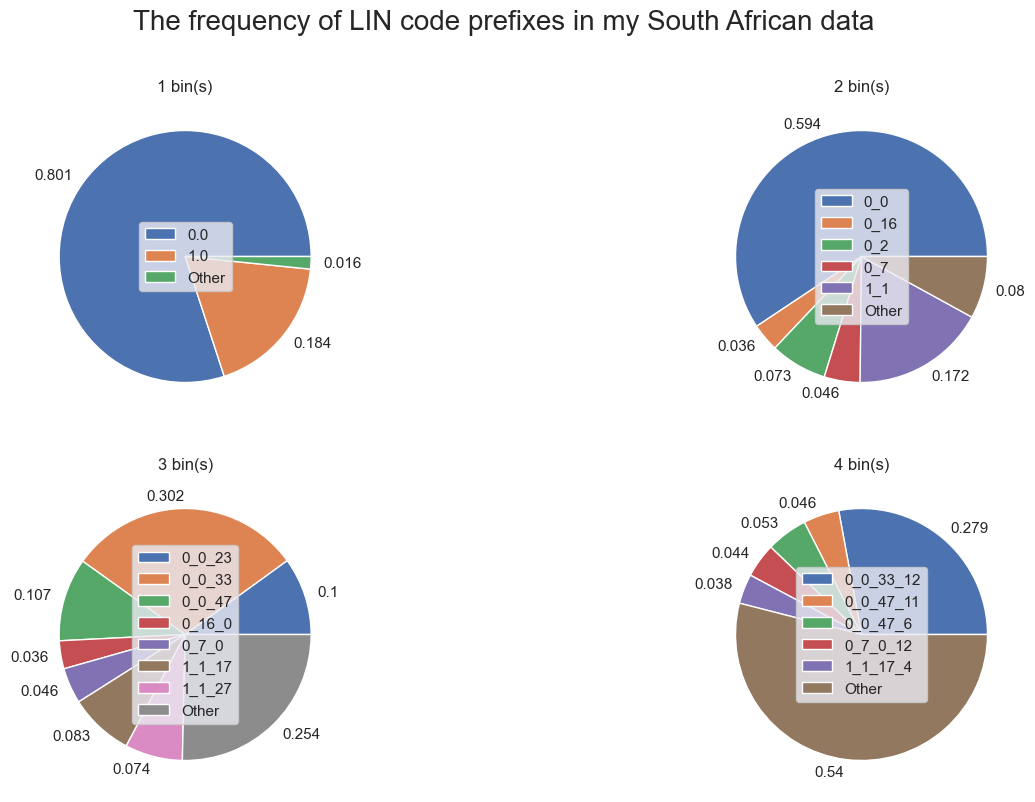

In [31]:
    # creating a figure with 4 subplots
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = my_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = my_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = my_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = my_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes in my South African data", fontsize = 20)

plt.show()

I have created a figure with 4 subplots. Each is a pie chart showing the proportion of LIN code prefixes (at a certain number of bins) in my South African dataset.

##### Lineage 0_0_33

In [32]:
    # importing metadata for 0_0_33 isolates
all_0_0_33: pd.DataFrame = pd.read_csv("Data/all_0_0_33.csv", sep = ",", header = "infer")

    # finding the mean/median/max azithromycin MICs in this lineage
print(f'''Azithromycin MIC mean: {np.nanmean(all_0_0_33["azithromycin_mic"]):.3f}
median: {np.nanmedian(all_0_0_33["azithromycin_mic"])}
max: {np.max(all_0_0_33["azithromycin_mic"])}
Number of resistant isolates: {len(all_0_0_33[all_0_0_33["azithromycin_mic"] > 1])}''')

#all_0_0_33[all_0_0_33["azithromycin_mic"] >= 1]


Azithromycin MIC mean: 0.142
median: 0.125
max: 1.5
Number of resistant isolates: 1


In [33]:
    # finding the mean/median/max Cefixime MICs in this lineage
print(f'''Cefixime MIC mean: {np.nanmean(all_0_0_33["cefixime_mic"]):.3f}
median: {np.nanmedian(all_0_0_33["cefixime_mic"])}
max: {np.max(all_0_0_33["cefixime_mic"])}
Number of resistant isolates: {len(all_0_0_33[all_0_0_33["cefixime_mic"] > 0.125])}''')

#all_0_0_33[all_0_0_33["cefixime_mic"] >= 0.125]


Cefixime MIC mean: 0.024
median: 0.016
max: 1.0
Number of resistant isolates: 9


In [34]:
    # finding the mean/median/max ceftriaxone MICs in this lineage
print(f'''Ceftriaxone MIC mean: {np.nanmean(all_0_0_33["ceftriaxone_mic"]):.3f}
median: {np.nanmedian(all_0_0_33["ceftriaxone_mic"])}
max: {np.max(all_0_0_33["ceftriaxone_mic"])}
Number of resistant isolates: {len(all_0_0_33[all_0_0_33["ceftriaxone_mic"] > 0.125])}''')

#all_0_0_33[all_0_0_33["ceftriaxone_mic"] >= 0.125]


Ceftriaxone MIC mean: 0.014
median: 0.008
max: 0.5
Number of resistant isolates: 5


I have imported data for all PubMLST isolates from lineage 0_0_33, including their MIC values for azithromycin, cefixime and ceftriaxone. 

In [35]:
    # finding the max MIC across isolates in this lineage from my SA isolates
res_0_0_33: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(my_lin[my_lin["LIN3"] == "0_0_33"]["id"])]

print(f'''Azithromycin max MIC: {np.max(res_0_0_33["azi_mic"])}
Cefixime max MIC: {np.max(res_0_0_33["cef_mic"])}
Ceftriaxone max MIC: {np.max(res_0_0_33["ceftri_mic"])}
''')

Azithromycin max MIC: 0.5
Cefixime max MIC: 0.047
Ceftriaxone max MIC: 0.016



I have also looked at the isolates from lineage 0_0_33 that are part of my South African collection.

##### Lineage 0_0_23

In [36]:
    # importing metadata for 0_0_23 isolates
all_0_0_23: pd.DataFrame = pd.read_csv("Data/all_0_0_23.csv", sep = ",", header = "infer")

    # finding the mean/median/max MIC for azithromycin in this lineage
print(f'''Azithromycin MIC mean: {np.nanmean(all_0_0_23["azithromycin_mic"]):.3f}
median: {np.nanmedian(all_0_0_23["azithromycin_mic"])}
max: {np.max(all_0_0_23["azithromycin_mic"])}
Number of resistant isolates: {len(all_0_0_23[all_0_0_23["azithromycin_mic"] > 1])}''')

#all_0_0_23[all_0_0_23["azithromycin_mic"] == 1]


Azithromycin MIC mean: 0.309
median: 0.25
max: 1.0
Number of resistant isolates: 0


In [37]:
    # finding the mean/median/max MIC for cefixime in this lineage
print(f'''Cefixime MIC mean: {np.nanmean(all_0_0_23["cefixime_mic"]):.3f}
median: {np.nanmedian(all_0_0_23["cefixime_mic"])}
max: {np.max(all_0_0_23["cefixime_mic"])}
Number of resistant isolates: {len(all_0_0_23[all_0_0_23["cefixime_mic"] > 0.125])}''')


Cefixime MIC mean: 0.016
median: 0.016
max: 0.023
Number of resistant isolates: 0


In [38]:
    # finding the mean/median/max MIC for ceftriaxone in this lineage
print(f'''Ceftriaxone MIC mean: {np.nanmean(all_0_0_23["ceftriaxone_mic"]):.3f}
median: {np.nanmedian(all_0_0_23["ceftriaxone_mic"])}
max: {np.max(all_0_0_23["ceftriaxone_mic"])}
Number of resistant isolates: {len(all_0_0_23[all_0_0_23["ceftriaxone_mic"] > 0.125])}''')


Ceftriaxone MIC mean: 0.004
median: 0.004
max: 0.012
Number of resistant isolates: 0


I have imported data for all PubMLST isolates from lineage 0_0_23, including their MIC values for azithromycin, cefixime and ceftriaxone. 


In [39]:
    # finding the max MIC across isolates in this lineage from my SA isolates
res_0_0_23: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(my_lin[my_lin["LIN3"] == "0_0_23"]["id"])]

print(f'''Azithromycin max MIC: {np.max(res_0_0_23["azi_mic"])}
Cefixime max MIC: {np.max(res_0_0_23["cef_mic"])}
Ceftriaxone max MIC: {np.max(res_0_0_23["ceftri_mic"])}
''')


Azithromycin max MIC: 1.0
Cefixime max MIC: 0.023
Ceftriaxone max MIC: 0.012



I have also looked at the isolates from lineage 0_0_23 that are part of my South African collection.

##### Lineage 0_0_47

In [40]:
    # importing metadata for 0_0_47 isolates
all_0_0_47: pd.DataFrame = pd.read_csv("Data/all_0_0_47.csv", sep = ",", header = "infer")

    # finding the mean/median/max MIC values for azithromycin in this lineage
print(f'''Azithromycin MIC mean: {np.nanmean(all_0_0_47["azithromycin_mic"]):.3f}
median: {np.nanmedian(all_0_0_47["azithromycin_mic"])}
max: {np.max(all_0_0_47["azithromycin_mic"])}
Number of resistant isolates: {len(all_0_0_47[all_0_0_47["azithromycin_mic"] > 1])}''')

#all_0_0_47[all_0_0_47["azithromycin_mic"] >= 1]


Azithromycin MIC mean: 0.250
median: 0.128
max: 4.0
Number of resistant isolates: 1


In [41]:
    # finding the mean/median/max MIC values for cefixime in this lineage
print(f'''Cefixime MIC mean: {np.nanmean(all_0_0_47["cefixime_mic"]):.3f}
median: {np.nanmedian(all_0_0_47["cefixime_mic"])}
max: {np.max(all_0_0_47["cefixime_mic"])}
Number of resistant isolates: {len(all_0_0_47[all_0_0_47["cefixime_mic"] > 0.125])}''')


Cefixime MIC mean: 0.021
median: 0.016
max: 0.047
Number of resistant isolates: 0


In [42]:
    # finding the mean/median/max MIC values for ceftriaxone in this lineage
print(f'''Ceftriaxone MIC mean: {np.nanmean(all_0_0_47["ceftriaxone_mic"]):.3f}
median: {np.nanmedian(all_0_0_47["ceftriaxone_mic"])}
max: {np.max(all_0_0_47["ceftriaxone_mic"])}
Number of resistant isolates: {len(all_0_0_47[all_0_0_47["ceftriaxone_mic"] > 1])}''')


Ceftriaxone MIC mean: 0.013
median: 0.008
max: 0.064
Number of resistant isolates: 0


I have imported data for all PubMLST isolates from lineage 0_0_47, including their MIC values for azithromycin, cefixime and ceftriaxone. 


In [43]:
    # finding the max MIC across isolates in this lineage from my SA isolates
res_0_0_47: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(my_lin[my_lin["LIN3"] == "0_0_47"]["id"])]

print(f'''Azithromycin max MIC: {np.max(res_0_0_47["azi_mic"])}
Cefixime max MIC: {np.max(res_0_0_47["cef_mic"])}
Ceftriaxone max MIC: {np.max(res_0_0_47["ceftri_mic"])}
''')


Azithromycin max MIC: 0.25
Cefixime max MIC: 0.016
Ceftriaxone max MIC: 0.016



I have also looked at the isolates from lineage 0_0_47 that are part of my South African collection.

#### Other collections

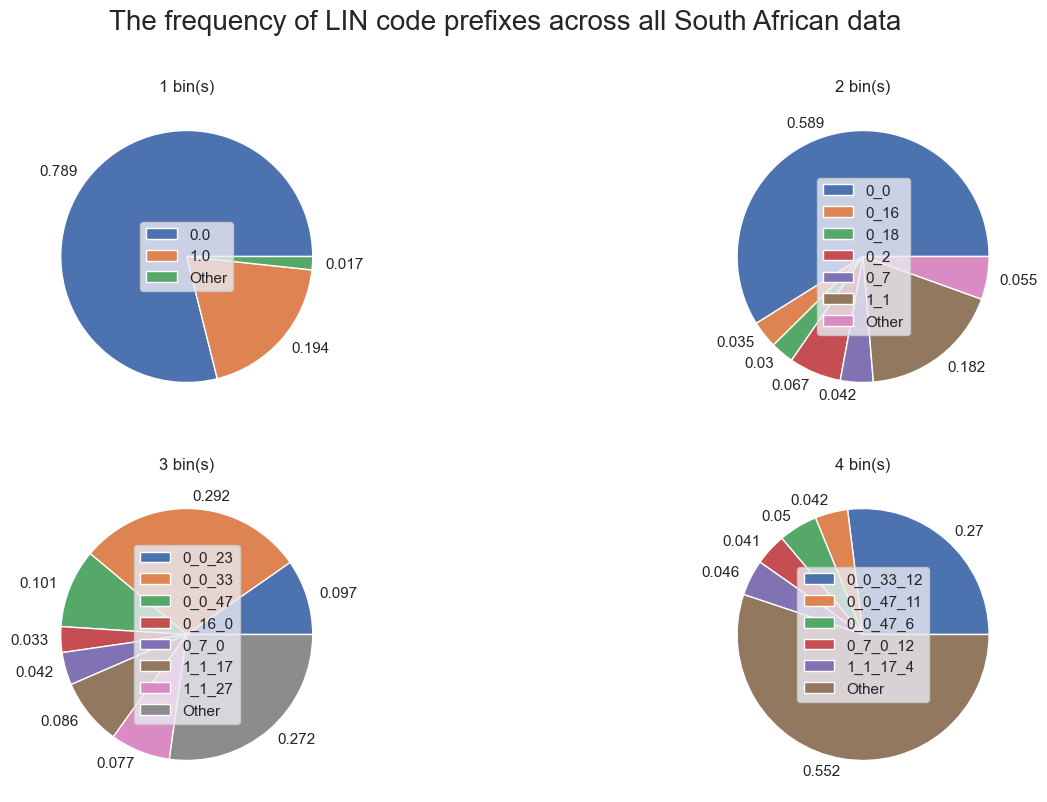

In [44]:
    # conducting the same operations for cgMLST/LIN code data for all of South Africa, including my data

    # Importing...
sa_lin: pd.DataFrame = pd.read_csv("Data/sa_lin.csv", sep = ",", header = "infer")
#sa_lin


    # Cleaning the dataframe...
Functions.clean(sa_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst"}, replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})
    
    
    # Changing variable type...
sa_lin.LIN1 = sa_lin.LIN1.astype(str)
sa_lin.LIN2 = sa_lin.LIN2.astype(str)
sa_lin.LIN3 = sa_lin.LIN3.astype(str)
sa_lin.LIN4 = sa_lin.LIN4.astype(str)
#sa_lin


    # Parsing out entries with missing data...
sa_lin_missing = sa_lin[sa_lin["cgst"].isnull()]
#sa_lin_missing
    # Counting the number of entries with missing data...
sa_lin_missing_count: pd.DataFrame = sa_lin.isnull().sum()
#sa_lin_missing_count

    # Identifying entries with data...
sa_lin_clean: pd.DataFrame = sa_lin.dropna(subset = "lincode")


    # Counting the proportion of prefixes, 1 bin(s)...
sa_lin_prop1: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN1")

    # 2 bin(s)
sa_lin_prop2: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN2")
    
    # 3 bin(s)
sa_lin_prop3: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN3")

    # 4 bin(s)
sa_lin_prop4: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN4")


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = sa_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = sa_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = sa_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = sa_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes across all South African data", fontsize = 20)

plt.show()

This figure represents the same type of information as the previous figure, but for isolates collected across the whole of South Africa.

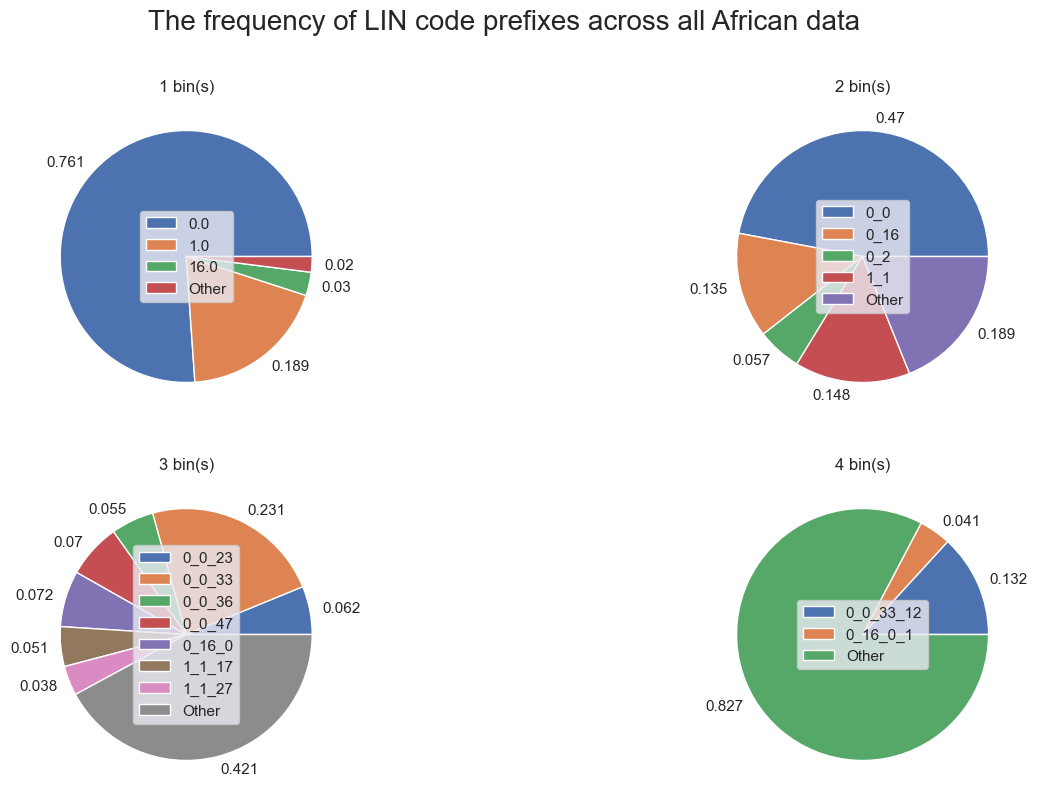

In [45]:
    # conducting the same operations for cgMLST/LIN code data for the whole of Africa, including my data

    # Importing...
afr_lin: pd.DataFrame = pd.read_csv("Data/afr_lin.csv", sep = ",", header = "infer")
#afr_lin


        # Cleaning the dataframe...
Functions.clean(afr_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst"}, replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})
    
    
    # Changing variable type...
afr_lin.LIN1 = afr_lin.LIN1.astype(str)
afr_lin.LIN2 = afr_lin.LIN2.astype(str)
afr_lin.LIN3 = afr_lin.LIN3.astype(str)
afr_lin.LIN4 = afr_lin.LIN4.astype(str)
#afr_lin


    # Parsing out entries with missing data...
afr_lin_missing = afr_lin[afr_lin["cgst"].isnull()]
#afr_lin_missing
    # Counting the number of entries with missing data...
afr_lin_missing_count: pd.DataFrame = afr_lin.isnull().sum()
#afr_lin_missing_count

    # Identifying entries with data...
afr_lin_clean: pd.DataFrame = afr_lin.dropna(subset = "lincode")


    # Counting the proportion of prefixes, 1 bin(s)...
afr_lin_prop1: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN1")

    # 2 bin(s)
afr_lin_prop2: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN2")
    
    # 3 bin(s)
afr_lin_prop3: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN3")

    # 4 bin(s)
afr_lin_prop4: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN4")


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = afr_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = afr_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = afr_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = afr_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes across all African data", fontsize = 20)

plt.show()


This figure represents the same type of information as the previous two figures, but for isolates collected across the whole of the continent of Africa.

#### Identifying lineages that are unique to my South African dataset

In [46]:
    # identifying unique lineages in my South African dataset
my_lin3_df: pd.DataFrame = pd.DataFrame({"Lineage": my_lin_clean["LIN3"].unique()})
print(f"Unique lineages in my SA collection: {len(my_lin3_df["Lineage"])}")

    # removing my South African data from the African dataset
afr_removed: pd.DataFrame = afr_lin_clean[~afr_lin_clean["isolate"].isin(my_lin_clean["isolate"])]

    # finding unique lineages in my South African dataset
unique_lin: pd.DataFrame = my_lin_clean[~my_lin_clean["LIN3"].isin(afr_removed["LIN3"])]
print(f"Lineages unique to my SA collection: {len(unique_lin["LIN3"].unique())}")
print(f"These lineages are: {list((unique_lin["LIN3"].unique()))}")


Unique lineages in my SA collection: 68
Lineages unique to my SA collection: 43
These lineages are: ['0_12_10', '1_3_0', '1_1_50', '1_3_1', '0_2_73', '1_1_51', '1_1_49', '1_1_40', '0_2_71', '0_12_11', '0_2_30', '0_0_72', '0_0_64', '11_0_5', '0_0_73', '0_0_61', '0_2_72', '51_0_1', '0_0_92', '1_15_1', '0_18_28', '17_0_1', '0_0_63', '1_1_65', '0_2_1', '0_2_85', '0_2_86', '0_31_0', '1_1_76', '0_0_110', '0_2_94', '0_31_1', '0_18_24', '1_7_2', '1_1_74', '0_2_93', '1_1_75', '0_2_92', '0_0_26', '0_0_108', '1_2_3', '1_1_52', '1_1_73']


Here, I have filtered the African collection to remove all entries of isolates that are from my South African sample. I then used the filtered *African* dataset to remove isolates from *my SA* dataset that shares a lineage with any of the remaining African isolates. This reveals that there are **43 lineages** that are unique to my South African dataset.

In [47]:
    # filtering the MIC dataframe for isolates from the unique lineages
unique_lin_amr: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(unique_lin["id"])]

    # merging dfs containing unique lineage MIC data & unique lineage LIN code data
unique_lin_amr2: pd.DataFrame = pd.merge(unique_lin, unique_lin_amr, how = "inner", on = "id")

    # simplifying for AZM MIC
unique_lin_azi = unique_lin_amr2[["id", "LIN3", "year", "azi_mic", "region"]]

    # extracting the MIC range for each unique lineage
unique_lin_azi_range = unique_lin_azi.groupby("LIN3")["azi_mic"].agg(lambda x: f"{x.min()} - {x.max()}").reset_index()

    # replacing lineages with no MIC data with NA
unique_lin_azi_range["azi_mic"] = unique_lin_azi_range["azi_mic"].replace("nan - nan", np.nan)

    # extracting year data for each lineage
unique_lin_year: pd.DataFrame = unique_lin_azi.groupby("LIN3")["year"].agg(lambda x: list(x))

    # extracting region data for each lineage
unique_lin_region: pd.DataFrame = unique_lin_azi.groupby("LIN3")["region"].agg(lambda x: list(x))

    # extracting count data for each lineage
unique_lin_count: pd.DataFrame = unique_lin_azi.groupby("LIN3")["id"].count().reset_index()

    # renaming column "id" to "Count"
unique_lin_count.rename(columns = {"id": "Count"}, inplace = True)

    # merging dfs containing AZM MIC range data $ year data for the unique lineages
unique_lin_final: pd.DataFrame = pd.merge(unique_lin_azi_range, unique_lin_year, on = "LIN3", how = "inner")

    #...then merging with df containing region data
unique_lin_final = pd.merge(unique_lin_final, unique_lin_region, on = "LIN3", how = "inner")

    #...and count data
unique_lin_final = pd.merge(unique_lin_final, unique_lin_count, on = "LIN3", how = "inner")

    # exporting as CSV file
#unique_lin_final.to_csv("Data_exp/unique_lineages_final.csv")


In [48]:
    # extracting the AZI MIC range of all unique isolates
print(f"AZI MIC range: {np.min(unique_lin_amr2["azi_mic"])} - {np.max(unique_lin_amr2["azi_mic"])} mg/L")
    # extracting the CFM MIC range of all unique isolates
print(f"CFM MIC range: {np.min(unique_lin_amr2["cef_mic"])} - {np.max(unique_lin_amr2["cef_mic"])} mg/L")
    # extracting the CRO MIC range of all unique isolates
print(f"CRO MIC range: {np.min(unique_lin_amr2["ceftri_mic"])} - {np.max(unique_lin_amr2["ceftri_mic"])} mg/L")


AZI MIC range: 0.064 - 0.5 mg/L
CFM MIC range: 0.016 - 0.016 mg/L
CRO MIC range: 0.002 - 0.03 mg/L


Here, I have extracted the AZM MIC data for all isolates that are from one of the 43 Ng lineages. The final dataframe contains data for the AZM MIC range, years identified, regions identified and number identified. This has been exported as "unique_lineages_final.csv".

In [49]:
    # importing LIN code data for ALL available isolates
world_lin: pd.DataFrame = pd.read_csv("Data/world_lin.csv", sep = ",", header = "infer")


    # cleaning the dataframe...
Functions.clean(world_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst"}, replace_val = [{"_": np.nan, "__": np.nan, "___": np.nan}])
    
    
    # changing variable type...
world_lin.LIN1 = world_lin.LIN1.astype(str)
world_lin.LIN2 = world_lin.LIN2.astype(str)
world_lin.LIN3 = world_lin.LIN3.astype(str)
world_lin.LIN4 = world_lin.LIN4.astype(str)

print(f"Dimensions of world_lin: {world_lin.shape}")

  # removing rows with missing data
world_lin_clean: pd.DataFrame = world_lin.dropna(subset = "lincode")

print(f"Entries with LIN code data: {len(world_lin_clean.index)}")


    # filtering out all African lineages from the World dataset
world_no_afr: pd.DataFrame = world_lin_clean[~world_lin_clean["isolate"].isin(afr_lin_clean["isolate"])]
print(f"There are {len(world_no_afr.index)} isolates from outside of Africa with a LIN code")

    # 
match_lin: pd.DataFrame = world_no_afr[world_no_afr["LIN3"].isin(unique_lin["LIN3"])]
print(f"Of the LIN codes that were unique to my South African sample, {len(match_lin["LIN3"].unique())} of them are found outside of Africa.")
print(f"These LIN codes are: {match_lin["LIN3"].unique()}")
    

Dimensions of world_lin: (28756, 8)
Entries with LIN code data: 26618
There are 24942 isolates from outside of Africa with a LIN code
Of the LIN codes that were unique to my South African sample, 2 of them are found outside of Africa.
These LIN codes are: ['0_2_1' '0_0_26']


Here, I have imported LIN code data for **all available Ng isolates** on PubMLST. After comparing the lineages from Africa that are unique to my South African collection, I have found that **2** of these lineages are also found outside of Africa. This suggests that those South African isolates are more closely related to some non-African isolates than African isolates.

In [50]:
    # creating a new DataFrame with isolates that are part of the 41 unique lineages
new_strains: pd.DataFrame = unique_lin.loc[~unique_lin["LIN3"].isin(["0_2_1", "0_0_26"])]

    # dropping unneeded columns
new_strains = new_strains.drop(new_strains.columns[[2,3,4,5,7]], axis = 1)


Here, I created a DataFrame with isolates that are from one of the 41 new lineages.

In [51]:
    # extracting the IDs of isolates that are part of the unique lineages
new_strains_id: pd.Series = new_strains["id"]

    # exporting their IDs
#new_strains_id.to_csv("Data_exp/new_strains_id.txt", index = False)


I have also extracted the ID of isolates that make up the 41 unique lineages. They are saved in a text file "new_strains_id".

In [52]:
    # extracting the MIC data for isolates that are part of the unique lineages
new_amr: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(new_strains["id"])]

    # adding LIN3 data to the df
new_amr = pd.merge(new_amr, new_strains, on = "id", how = "inner")

    # dropping duplicate column
new_amr.drop(columns = ["isolate_y"], inplace = True)

    # extracting AZM MIC range
print(f"AZI MIC range: {np.min(new_amr["azi_mic"])} - {np.max(new_amr["azi_mic"])} mg/L")
    # extracting CFM MIC range
print(f"CEF MIC range: {np.min(new_amr["cef_mic"])} - {np.max(new_amr["cef_mic"])} mg/L")
    # extracting CRO MIC range
print(f"CRO MIC range: {np.min(new_amr["ceftri_mic"])} - {np.max(new_amr["ceftri_mic"])} mg/L")

    # identifying the number of isolates with reduced susceptibility to AZM
print(f"There are {len(new_amr[new_amr["azi_mic"] > 0.25])} isolates with reduced susceptibility to AZI")
    # extracting those same isolates
unique_lin_azi[unique_lin_azi["id"].isin(new_amr[new_amr["azi_mic"] > 0.25]["id"])]


AZI MIC range: 0.064 - 0.5 mg/L
CEF MIC range: 0.016 - 0.016 mg/L
CRO MIC range: 0.002 - 0.03 mg/L
There are 3 isolates with reduced susceptibility to AZI


,id,LIN3,year,azi_mic,region
29,140570,0_0_63,2018,0.5,Northern Cape
34,140605,0_2_71,2017,0.5,Eastern Cape
37,140613,0_0_63,2019,0.5,Gauteng Province


I have extracted the AZM, CFM and CRO MIC range for all isolates that are part from one of the 41 novel Ng lineages. None are resistant, but there are 3 isolates with reduced susceptibility to AZM.

In [53]:
    # finding the mean AZI MIC each year
new_amr_mic_by_year: pd.DataFrame = pd.DataFrame(new_amr.groupby("year")["azi_mic"].mean()).reset_index().rename(columns = {"azi_mic": "mean AZM MIC"})
    # finding the number of isolates sampled each year
new_amr_count_by_year: pd.DataFrame = pd.DataFrame(new_amr.groupby("year")["id"].count()).reset_index().rename(columns = {"id": "isolate count"})
    # finding the number of lineages sampled each year
new_amr_div_by_year: pd.DataFrame = pd.DataFrame(new_amr.groupby("year")["LIN3"].nunique()).reset_index().rename(columns = {"LIN3": "lineage count"})

    # merging dfs
new_amr_final: pd.DataFrame = pd.merge(new_amr_mic_by_year, new_amr_count_by_year, on = "year", how = "inner")
    # merging dfs
new_amr_final: pd.DataFrame = pd.merge(new_amr_final, new_amr_div_by_year, on = "year", how = "inner")


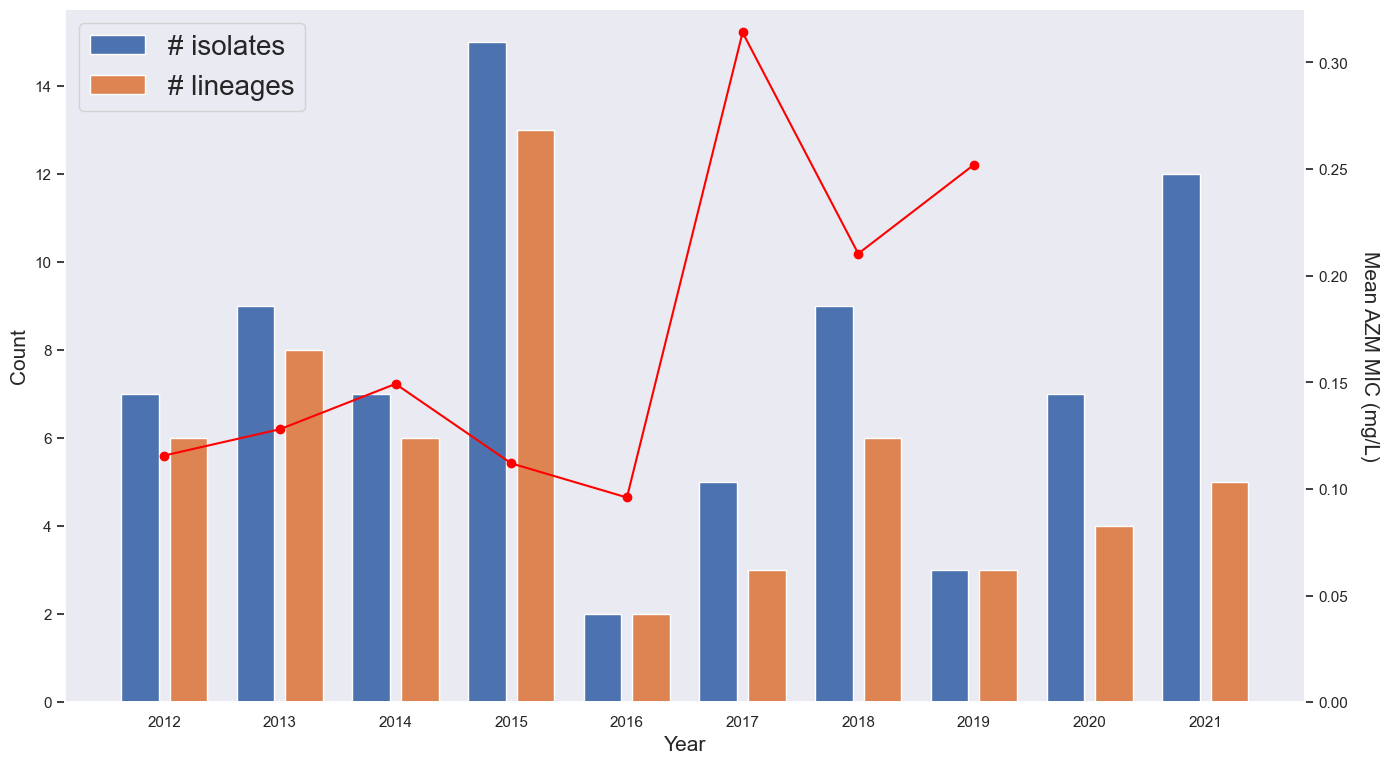

In [54]:
    # creating regular intervals for the x-axis 
sp = np.arange(len(new_amr_final))
    
    # creating the figure
fig, ax1 = plt.subplots(figsize = (16,9))

    # creating a bar graph for isolate count
ax1.bar(data = new_amr_final, x = sp - 0.21, height = "isolate count", width = 0.325, label = "# isolates")
    # creating a bar graph for lineage count
ax1.bar(data = new_amr_final, x = sp + 0.21, height = "lineage count", width = 0.325, label = "# lineages")

    # adding xtick labels
ax1.set_xticks(ticks = sp, labels = new_amr_final["year"])
    # adding x-axis label
ax1.set_xlabel("Year", fontsize = 15)
    # adding y-axis label
ax1.set_ylabel("Count", fontsize = 15)
    # adding legend
ax1.legend(fontsize = 20, loc = "upper left")

    # creating another plot
ax2 = ax1.twinx()

    # adding MIC data on the new y-axis
ax2.plot(sp, new_amr_final["mean AZM MIC"], color = "red", marker = "o", label = "Mean AZM MIC (mg/L)")
    # adding another y-axis label
ax2.set_ylabel("Mean AZM MIC (mg/L)", fontsize = 15, rotation = 270)
    # position the y-axis label
ax2.yaxis.set_label_coords(x = 1.06,y = 0.5)
    # adding yticks
ax2.tick_params(axis = "y")
    # changing y-axis limit
ax2.set_ylim(bottom = 0)

    # removing gridlines
ax1.grid(visible = False)
ax2.grid(visible = False)

plt.show()

Looking at only the isolates that are from one of the 41 novel lineages, this figure shows (i) the number of isolates sampled each year, (ii) the number of lineages sample each year and (iii) the mean AZM MIC of isolates sampled each year. Each year, novel lineages were sampled from.

In [55]:
    # extracting range, mean and median of lineages identified each year
print(f"Lineage count range: {min(new_amr_final["lineage count"])} - {max(new_amr_final["lineage count"])}")
print(f"Lineage count mean: {new_amr_final["lineage count"].mean()}")
print(f"Lineage count median: {new_amr_final["lineage count"].median()}")


Lineage count range: 2 - 13
Lineage count mean: 5.6
Lineage count median: 5.5


Some additional stats regarding the novel lineages.

### Genotypic & Phenotypic AMR links

#### Searching for missing mtrR data

In [56]:
    # importing all pubMLST data
mtrR_724: pd.DataFrame = pd.read_csv("Data/724_all_mtrR.csv", sep = ",", header = "infer")
    # filtering for rows with any missing data
mtrR_724_na: pd.DataFrame = mtrR_724[mtrR_724.isna().any(axis = 1)]

print(f"{len(mtrR_724_na[mtrR_724_na[["'mtrR", "NEIS1635", "pro_NEIS1635"]].isna().all(axis = 1)])} isolate(s) have no data at all. These isolate(s) are {list(mtrR_724_na[mtrR_724_na[["'mtrR", "NEIS1635", "pro_NEIS1635"]].isna().all(axis = 1)]["id"])}")

mtrR_724.loc[mtrR_724["id"] == 131126]

1 isolate(s) have no data at all. These isolate(s) are [131171]


,id,isolate,'mtrR,NEIS1635,pro_NEIS1635
45,131126,GP-12-MUS-242,NaN,NaN,6.0


I have imported the allele ID data for all 706 SA isolates + 18 WHO reference isolates. I have filtered the dataframe for isolates missing data in all of the three loci. I have checked pubMLST to confirm the absence of data for isolate 131171.

In [57]:
    # filtering for rows with missing 'mtrR data
whole_mtrR_na: pd.DataFrame = mtrR_724_na[mtrR_724_na["'mtrR"].isna()]

    # filtering for rows with missing mtrR coding sequence data
NEIS1635_na: pd.DataFrame = mtrR_724_na[mtrR_724_na["NEIS1635"].isna()]

    # filtering for rows with missing mtrR promoter sequence data
pro_NEIS1635_na: pd.DataFrame = mtrR_724_na[mtrR_724_na["pro_NEIS1635"].isna()]


I have filtered the data for isolates missing data in each of the three loci.

##### Coding Sequence - 'mtrR & NEIS1635

In [58]:
print(f"{len(whole_mtrR_na)} isolate(s) have no 'mtrR data.")
print(f"{len(NEIS1635_na)} isolate(s) have no NEIS1635 data.")
    
    # identifying isolates with no 'mtrR data but has CDS data
print(f"{len(whole_mtrR_na[~whole_mtrR_na["NEIS1635"].isna()])} isolate(s) have no 'mtrR but DO have NEIS1635 data, therefore do have mtrR coding region data. These isolates are {list(whole_mtrR_na[~whole_mtrR_na["NEIS1635"].isna()]["id"])}")
#whole_mtrR_na.loc[whole_mtrR_na["id"] == 155431]
#whole_mtrR_na.loc[whole_mtrR_na["id"] == 155546]

    # identifying isolates with no CDS data but has 'mtrR data
print(f"{len(NEIS1635_na[~NEIS1635_na["'mtrR"].isna()])} isolate(s) have no NEIS1635 data but DO have 'mtrR data")


27 isolate(s) have no 'mtrR data.
132 isolate(s) have no NEIS1635 data.
2 isolate(s) have no 'mtrR but DO have NEIS1635 data, therefore do have mtrR coding region data. These isolates are [155431, 155546]
107 isolate(s) have no NEIS1635 data but DO have 'mtrR data


This confirms that I should use 'mtrR sequence data, rather than NEIS1635, to obtain mtrR CDS data.

Geneious Prime tells me that 24 'mtrR sequences are missing, not 27. After looking for the presence of sequence data for each of the 27 isolates, I found that IDs 131126, 131322 and 140572 *DO* have sequence data, but not an assigned allele.

Isolate IDs 155431 and 155546 do not have any sequence data for 'mtrR, which I confirmed on Geneious Prime. However, I can acquire the CDS data using NEIS1635. 

In [59]:
    # identifying isolates with no 'mtrR or CDS data
print(f"{len(whole_mtrR_na[whole_mtrR_na["NEIS1635"].isna()])} isolate(s) have no 'mtrR OR NEIS1635 data, therefore no mtrR coding region data.")


25 isolate(s) have no 'mtrR OR NEIS1635 data, therefore no mtrR coding region data.


IDs 131126, 131126 and 140572 *DO* have 'mtrR sequence data. Therefore, the actual number of isolates with no CDS data is **22**.

##### Promoter sequence - 'mtrR & pro_NEIS1635

In [60]:
print(f"{len(whole_mtrR_na)} isolate(s) have no 'mtrR data.")
print(f"{len(pro_NEIS1635_na)} isolate(s) have no pro_NEIS1635 data.")

    # identifying isolates with no promoter sequence data, but have 'mtrR data
print(f"{len(pro_NEIS1635_na[~pro_NEIS1635_na["'mtrR"].isna()])} isolate(s) have no pro_NEIS1635 data but DO have 'mtrR data, therefore do have mtrR promoter region data.")


27 isolate(s) have no 'mtrR data.
29 isolate(s) have no pro_NEIS1635 data.
27 isolate(s) have no pro_NEIS1635 data but DO have 'mtrR data, therefore do have mtrR promoter region data.


Geneious Prime identifies 29 missing sequences, which aligns with the above. 27 of these isolates have promoter region data within 'mtrR.

In [61]:
    # identifying the missing isolates
missing_pro: pd.Series = pro_NEIS1635_na[~pro_NEIS1635_na["'mtrR"].isna()]["id"]

    # exporting their IDs
#missing_pro.to_csv("Data_exp/27_mtrR_pro.txt", index = False)


I have exported the ID of the isolates that have mtrR promoter data in 'mtrD, but not pro_NEIS1635. Their sequences will be extracted from pubMLST and manually added to the alignment.

In [62]:
    # identifying rows with no promoter sequence data or 'mtrR data
print(f"{len(pro_NEIS1635_na[pro_NEIS1635_na["'mtrR"].isna()])} isolate(s) have no pro_NEIS1635 data OR 'mtrR data, so have no mtrR promoter region data. These isolate are {list(pro_NEIS1635_na[pro_NEIS1635_na["'mtrR"].isna()]["id"])}")

#pro_NEIS1635_na[~pro_NEIS1635_na["'mtrR"].isna()]
#pro_NEIS1635_na[pro_NEIS1635_na["'mtrR"].isna()]


2 isolate(s) have no pro_NEIS1635 data OR 'mtrR data, so have no mtrR promoter region data. These isolate are [131171, 155431]


There are two isolates that have neither sequence data, so cannot be obtained.

#### Identifying premature stop codons - mtrR

In [63]:
    # importing translated mtrR sequence data
mtrR_cds: pd.DataFrame = pd.read_csv("Data/mtrR_CDS_trans_align.csv", sep = ",", header = "infer")

    # identifying isolates with premature stop codons
pre_mtrR: pd.DataFrame = mtrR_cds[mtrR_cds["Sequence"].str.contains("*", na = False, regex = False)]

    # extracting the id of isolates
pre_mtrR_id: pd.Series = pre_mtrR["Name"].str.split("|").explode().reset_index(drop = True)
pre_mtrR_id = pre_mtrR_id[::2]

    # saving
#pre_mtrR_id.to_csv("Data_exp/premature_mtrR_id.txt", index = False)


I have imported the translated sequence data of mtrR for my South African isolates (where available). As alignment software records premature stop-codons with a "*", by filtering for this character I have identified rows/isolates with a premature stop codon. There are 47 isolates with a premature stop codon. I extracted their IDs and saved them as "premature_mtrR_id.txt".

#### Identifying isolates with G70D

In [64]:
    # importing aligned RplD sequence data for all South African isolates
rpld_trans: pd.DataFrame = pd.read_csv("Data/rplD_trans.csv", sep = ",", header = "infer")

    # identifying isolates with the G70D mutation
g_to_d: pd.DataFrame = rpld_trans[rpld_trans["Sequence"].str[69] == "D"]

    # extracting their ids
g_to_d_id: pd.Series = g_to_d["Name"].str.split("|").explode().reset_index(drop = True)
g_to_d_id = g_to_d_id[::2]
    
    # exporting their ids
#g_to_d_id.to_csv("Data_exp/G70D_id.txt", index = False)


I have identified all isolates in the South African collection with the G70D mutation in rplD, then exported their IDs for use in PubMLST.

#### mtrD Allele Numbers

This code will be for finding all unique allele numbers for MtrD that are found in 16 human-associated Neisseria species. This will be used to identify mosaicism in my South African isolates.

In [65]:
    # importing allele number data
allele_num: pd.DataFrame = pd.read_csv("Data/neis_allele_id.csv", sep = ",", header = "infer")


    # dropping columns except for MtrD allele ID
mtrd_num_clean: pd.DataFrame = allele_num.drop(columns = ["id", "isolate", "NEIS1635", "pro_NEIS1635","private_record", "private_owner"], axis = 1)

    # removing NAs
mtrd_num_clean = mtrd_num_clean.dropna(axis = 0, how = "any")

print(f"There are {len(mtrd_num_clean)} Neisseria isolates assigned with an MtrD allele number")


    # removing duplicates
mtrd_num_unique: pd.Series = pd.Series(mtrd_num_clean["NEIS1633"].unique())

print(f"There are {len(mtrd_num_unique)} unique allele records across the 16 species")


    # identifying rows with multiple allele 
mtrd_multi: pd.Series = mtrd_num_unique[mtrd_num_unique.str.contains(";")]
mtrd_multi.name = "mtrD"
    # creating a Series for the inverse
mtrd_single: pd.Series = mtrd_num_unique[~mtrd_num_unique.str.contains(";")]

print(f"There are {len(mtrd_multi)} rows with multiple allele numbers. These are: {list(mtrd_multi)}")

    # separating the alleles
mtrd_multi_split: pd.Series = mtrd_multi.str.split(";").explode().reset_index(drop = True)


    # identifying whether these numbers are the only representatives across the Neisseria species
mtrd_multi_dup: pd.Series = mtrd_multi_split[mtrd_multi_split.isin(mtrd_single)]
print(f"Alleles {list(mtrd_multi_dup)} are also possessed by other isolates")
    
    # inverse...
mtrd_multi_unique: pd.Series = mtrd_multi_split[~mtrd_multi_split.isin(mtrd_single)]
print(f"Alleles {list(mtrd_multi_unique)} are NOT possessed by other isolates")


There are 72259 Neisseria isolates assigned with an MtrD allele number
There are 4033 unique allele records across the 16 species
There are 3 rows with multiple allele numbers. These are: ['29;34', '49;2941', '33;687']
Alleles ['29', '49', '33', '687'] are also possessed by other isolates
Alleles ['34', '2941'] are NOT possessed by other isolates


Excluding the entries with multiple allele numbers assigned, there are 4030 UNIQUE allele IDs. Of the six allele numbers that were part of a double-entry, 4 are already found in the 4030. The other 2 are unique. Therefore, in my final list of MtrD allele IDs, I should have 4032 alleles.

In [66]:
    # combining the list of unique single entries with those that were part of double-entries
mtrd_final: pd.Series = pd.concat([mtrd_single, mtrd_multi_split], axis = 0).reset_index(drop = True)

    # again, removing duplicates
mtrd_final = pd.Series(mtrd_final.unique())

print(f"Across the 16 Neisseria species, there are {len(mtrd_final)} unique allele IDs")

Across the 16 Neisseria species, there are 4032 unique allele IDs


This filtering process has given me all the unique allele numbers across the 16 species of Neisseria. I will export the sequence of these alleles to be aligned in MEGA. Then I will construct a phylogeny from this alignment in order to see if there is any sign of recombination in my isolates. 

In [67]:
    # changing the name of the series
mtrd_final.name = "mtrD"

#mtrd_final.to_csv("Data_exp/NEIS_MtrD.txt", index = False, header = True)


I have exported the MtrD allele IDs as "NEIS_MtrD.txt" and will export these sequences from PubMLST. I then need to match each allele ID to a species for annotation in iToL.

In [68]:
    # importing species-allele ID data
species_allele: pd.DataFrame = pd.read_csv("Data/species_allele.csv", sep = ",", header = "infer")

    # filtering for mtrD data
species_allele_mtrd: pd.DataFrame = species_allele.drop(columns = ["NEIS1635", "pro_NEIS1635"], axis = 1)


    # removing NAs
species_allele_mtrd_clean: pd.DataFrame = species_allele_mtrd.dropna(subset = "NEIS1633")


    # identifying rows with multiple alleles
species_allele_mtrd_multi: pd.DataFrame = species_allele_mtrd_clean[species_allele_mtrd_clean["NEIS1633"].str.contains(";")]

    # copying the DataFrame
species_allele_mtrd_multi2 = species_allele_mtrd_multi.copy()

    # adding a new column to preserve species data
species_allele_mtrd_multi2["split"] = species_allele_mtrd_multi["NEIS1633"].str.split(";")

    # splitting the multi-species entries into individual rows
species_allele_mtrd_multi2 = species_allele_mtrd_multi2.explode(column = "split")

    # creating a new DataFrame with species & split allele data
species_allele_mtrd_multi_final: pd.DataFrame = species_allele_mtrd_multi2.loc[:, ["species", "split"]]
    # renaming column "split" to "NEIS1633"
species_allele_mtrd_multi_final.rename(columns = {"split": "NEIS1633"}, inplace = True)

    # creating a Series for the inverse (single entries)
species_allele_mtrd_single: pd.DataFrame = species_allele_mtrd_clean[~species_allele_mtrd_clean["NEIS1633"].str.contains(";")]

    # combining the list of unique single entries with those that were part of double-entries
species_allele_mtrd_clean2: pd.DataFrame = pd.concat([species_allele_mtrd_single, species_allele_mtrd_multi_final], axis = 0).reset_index(drop = True)


I have imported all MtrD alleles IDs found across the Neisseria species, from PubMLST. I then identified rows that have multiple allele IDs (isolates that were allocated multiple alleles) and split the alleles into their own rows.

In [69]:
    # removing duplicates ROWS (specific species with a specific allele)
species_allele_mtrd_final: pd.DataFrame = species_allele_mtrd_clean2.drop_duplicates(subset = ["species", "NEIS1633"])


    # identifying duplicates of mtrD
duplicate_mtrd: pd.DataFrame = species_allele_mtrd_final[species_allele_mtrd_final.duplicated("NEIS1633", keep = False)]
    # creating a DataFrame for the inverse
single_mtrd: pd.DataFrame = species_allele_mtrd_final[~species_allele_mtrd_final.duplicated("NEIS1633", keep = False)]


    # creating a list of the duplicate allele IDs
mtrd_dup_list: list = list(duplicate_mtrd["NEIS1633"])
    # finding the unique allele IDs
mtrd_dup_list_uni: list = list(set(mtrd_dup_list))

    # creating a new DataFrame, marking the duplicate IDs as "Multiple"
multiple_species_mtrd: pd.DataFrame = pd.DataFrame({"species": "Multiple", "NEIS1633": mtrd_dup_list_uni})


    # creating a single DataFrame with all alleles
mtrd_allele_final: pd.DataFrame = pd.concat([single_mtrd, multiple_species_mtrd], axis = 0).reset_index(drop = True)


I identified all combinations of MtrD allele ID & species that appear more than once and marked their species value as "multiple", which will show up in the iToL produced.

In [70]:
    # importing tree node labels - header changed to "MtrD"
mtrd_nodes: pd.DataFrame = pd.read_csv("Data/mtrd_nodes.csv", sep = ",", header = "infer")

    # checking lengths and type
print(len(mtrd_allele_final), type(mtrd_allele_final.loc[0, "NEIS1633"]))
print(len(mtrd_nodes), type(mtrd_nodes.loc[0, "NEIS1633"]))

    # changing NEIS1633 values to integers
mtrd_allele_final["NEIS1633"] = mtrd_allele_final["NEIS1633"].astype(int)

    # checking again
print(len(mtrd_allele_final), type(mtrd_allele_final.loc[0, "NEIS1633"]))
print(len(mtrd_nodes), type(mtrd_nodes.loc[0, "NEIS1633"]))


    # aligning species_allele data to the node labels
aligned_mtrd: pd.DataFrame = pd.merge(mtrd_nodes, mtrd_allele_final, on = "NEIS1633", how = "left")


    # adding a new column for range labels
aligned_mtrd["label"] = aligned_mtrd["species"]

    # shortening names
aligned_mtrd = aligned_mtrd.map(lambda x: x.replace('Neisseria ', 'N.') if isinstance(x, str) else x)


#print(f"The species names are: {list(aligned_mtrd["species"].unique())}")


    # replacing species names with colours for use in iToL
aligned_mtrd["species"] = aligned_mtrd["species"].replace(to_replace = ['N.meningitidis', 'N.gonorrhoeae', 'N.polysaccharea', 'N.cinerea', 'Multiple', 'N.lactamica', 'N.basseii', 'N.bergeri', 'N.benedictiae', 'N.blantyrii', 'N.viridiae', 'N.maigaei', 'N.oralis', 'N.mucosa', 'N.subflava'], value = ["#0432FF", "#FF2600", "#00FDFF", "#FF40FF", "#00FA00", "#FF9300", "#942092", "#FFFC00", "#AB7942", "#008200", "#9E6694", "#647D51", "#AABD99", "#C15747", "#B2B6B6"])

    # replacing NAs - my isolates of interest - NO LONGER APPLICABLE
#aligned_mtrd.fillna(value = "#000000", inplace = True)


print(f"Species names are now: {list(aligned_mtrd["species"].unique())}")


    # exporting as csv...
#aligned_mtrd.to_csv("Data_exp/aligned_mtrd.csv", index = False)


4032 <class 'str'>
4032 <class 'numpy.int64'>
4032 <class 'numpy.int64'>
4032 <class 'numpy.int64'>
Species names are now: ['#0432FF', '#00FA00', '#FF2600', '#00FDFF', '#FF40FF', '#942092', '#FF9300', '#AB7942', '#FFFC00', '#008200', '#9E6694', '#647D51', '#AABD99', '#C15747', '#B2B6B6']


I imported iToL node labels, which are used to align my final species-allele ID DataFrame against. I also added a new column to assign colours to species. The resulting aligned DataFrame was exported as a csv - "aligned_mtrd.csv".

I also want to highlight which alleles are found in my South African collection:

In [71]:
    # importing my SA allele id data
my_allele_num = pd.read_csv("Data/my_allele_id.csv", sep = ",", header = "infer")

    # filtering for mtrD data
my_mtrd_id: pd.DataFrame = my_allele_num[["id", "isolate", "NEIS1633"]]

    # removing NAs
my_mtrd_id_clean: pd.DataFrame = my_mtrd_id.dropna(subset = "NEIS1633")

    # identifying unique allele ids
my_mtrd_id_uniq: pd.DataFrame = pd.DataFrame(my_mtrd_id_clean["NEIS1633"].unique())
    # changing column name
my_mtrd_id_uniq.columns = ["NEIS1633"]
    # adding a duplicate of this column
my_mtrd_id_uniq["Colour"] = my_mtrd_id_uniq["NEIS1633"]


    # aligning the allele ids with the iToL nodes
aligned_mtrd_my_id: pd.DataFrame = pd.merge(mtrd_nodes, my_mtrd_id_uniq, on = "NEIS1633", how = "left")

    # making values a string type
aligned_mtrd_my_id["Colour"] = aligned_mtrd_my_id["Colour"].astype(str)

    # changing IDs found in my SA data to "#0D2677" - a dark blue in iToL
aligned_mtrd_my_id.loc[aligned_mtrd_my_id["Colour"] != "nan","Colour"] = "#0D2677"
    # changing all others to "#C5D8D9" - a light grey in iToL
aligned_mtrd_my_id.loc[aligned_mtrd_my_id["Colour"] == "nan","Colour"] = "#C5D8D9"


    # duplicating the Colour column
aligned_mtrd_my_id["Label"] = aligned_mtrd_my_id["Colour"]

    # changing labels of my SA data
aligned_mtrd_my_id.loc[aligned_mtrd_my_id["Label"] == "#0D2677", "Label"] = "New Data"
    # changing labels of other data
aligned_mtrd_my_id.loc[aligned_mtrd_my_id["Label"] == "#C5D8D9", "Label"] = "Neisseria Data"


    # exporting dataframe
#aligned_mtrd_my_id.to_csv("Data_exp/itol_my_mtrd.csv", index = False)


I have aligned mtrD allele ID data from my South African sample to the iToL nodes. The output csv file will be used to annotate the iToL depending on whether mtrD allele IDs are found in my dataset. 

#### mtrR allele numbers

This set of code will complete the same process as the above for mtrD - identifying all mtrR alleles that are found across Neisseria species and constructing an annotated iToL out of their nucleotide sequences.

In [72]:
    # dropping columns except for mtrR allele ID
mtrR_num_clean: pd.DataFrame = allele_num.drop(columns = ["id", "isolate", "NEIS1633", "pro_NEIS1635","private_record", "private_owner"], axis = 1)

    # removing NAs
mtrR_num_clean = mtrR_num_clean.dropna(axis = 0, how = "any")

print(f"There are {len(mtrR_num_clean)} Neisseria isolates assigned with an mtrR allele number")


    # removing duplicates
mtrR_num_unique: pd.Series = pd.Series(mtrR_num_clean["NEIS1635"].unique())

print(f"There are {len(mtrR_num_unique)} unique allele records across the 16 species")


    # identifying rows with multiple allele 
mtrR_multi: pd.Series = mtrR_num_unique[mtrR_num_unique.str.contains(";")]
mtrR_multi.name = "mtrR"
    # creating a Series for the inverse
mtrR_single: pd.Series = mtrR_num_unique[~mtrR_num_unique.str.contains(";")]

print(f"There are {len(mtrR_multi)} rows with multiple allele numbers. These are: {list(mtrR_multi)}")

    # separating the alleles
mtrR_multi_split: pd.Series = mtrR_multi.str.split(";").explode().reset_index(drop = True)


    # identifying whether these numbers are the only representatives across the Neisseria species
mtrR_multi_dup: pd.Series = mtrR_multi_split[mtrR_multi_split.isin(mtrR_single)]
print(f"Alleles {list(mtrR_multi_dup)} are also possessed by other isolates")
    
    # inverse...
mtrR_multi_unique: pd.Series = mtrR_multi_split[~mtrR_multi_split.isin(mtrR_single)]
print(f"Alleles {list(mtrR_multi_unique)} are NOT possessed by other isolates")


There are 71354 Neisseria isolates assigned with an mtrR allele number
There are 1985 unique allele records across the 16 species
There are 1 rows with multiple allele numbers. These are: ['4;97']
Alleles ['4', '97'] are also possessed by other isolates
Alleles [] are NOT possessed by other isolates


In [73]:
    # combining the list of unique single entries with those that were part of double-entries
mtrR_final: pd.Series = pd.concat([mtrR_single, mtrR_multi_split], axis = 0).reset_index(drop = True)

    # again, removing duplicates
mtrR_final = pd.Series(mtrR_final.unique())

print(f"Across the 16 Neisseria species, there are {len(mtrR_final)} unique allele IDs")

Across the 16 Neisseria species, there are 1984 unique allele IDs


In [74]:
    # changing the name of the series
mtrR_final.name = "mtrR"

#mtrR_final.to_csv("Data_exp/NEIS_mtrR.txt", index = False, header = True)


In [75]:
    # filtering for mtrR data
species_allele_mtrR: pd.DataFrame = species_allele.drop(columns = ["NEIS1633", "pro_NEIS1635"], axis = 1)


    # removing NAs
species_allele_mtrR_clean: pd.DataFrame = species_allele_mtrR.dropna(subset = "NEIS1635")


    # identifying rows with multiple alleles
species_allele_mtrR_multi: pd.DataFrame = species_allele_mtrR_clean[species_allele_mtrR_clean["NEIS1635"].str.contains(";")]

    # copying the DataFrame
species_allele_mtrR_multi2 = species_allele_mtrR_multi.copy()

    # adding a new column to preserve species data
species_allele_mtrR_multi2["split"] = species_allele_mtrR_multi["NEIS1635"].str.split(";")

    # splitting the multi-species entries into individual rows
species_allele_mtrR_multi2 = species_allele_mtrR_multi2.explode(column = "split")

    # creating a new DataFrame with species & split allele data
species_allele_mtrR_multi_final: pd.DataFrame = species_allele_mtrR_multi2.loc[:, ["species", "split"]]
    # renaming column "split" to "NEIS1635"
species_allele_mtrR_multi_final.rename(columns = {"split": "NEIS1635"}, inplace = True)

    # creating a Series for the inverse (single entries)
species_allele_mtrR_single: pd.DataFrame = species_allele_mtrR_clean[~species_allele_mtrR_clean["NEIS1635"].str.contains(";")]

    # combining the list of unique single entries with those that were part of double-entries
species_allele_mtrR_clean2: pd.DataFrame = pd.concat([species_allele_mtrR_single, species_allele_mtrR_multi_final], axis = 0).reset_index(drop = True)


In [76]:
    # removing duplicates ROWS (specific species with a specific allele)
species_allele_mtrR_final: pd.DataFrame = species_allele_mtrR_clean2.drop_duplicates(subset = ["species", "NEIS1635"])


    # identifying duplicates of mtrR
duplicate_mtrR: pd.DataFrame = species_allele_mtrR_final[species_allele_mtrR_final.duplicated("NEIS1635", keep = False)]
    # creating a DataFrame for the inverse
single_mtrR: pd.DataFrame = species_allele_mtrR_final[~species_allele_mtrR_final.duplicated("NEIS1635", keep = False)]


    # creating a list of the duplicate allele IDs
mtrR_dup_list: list = list(duplicate_mtrR["NEIS1635"])
    # finding the unique allele IDs
mtrR_dup_list_uni: list = list(set(mtrR_dup_list))

    # creating a new DataFrame, marking the duplicate IDs as "Multiple"
multiple_species_mtrR: pd.DataFrame = pd.DataFrame({"species": "Multiple", "NEIS1635": mtrR_dup_list_uni})


    # creating a single DataFrame with all alleles
mtrR_allele_final: pd.DataFrame = pd.concat([single_mtrR, multiple_species_mtrR], axis = 0).reset_index(drop = True)


In [77]:
    # importing tree node labels - header changed to "mtrR"
mtrR_nodes: pd.DataFrame = pd.read_csv("Data/mtrR_nodes.csv", sep = ",", header = "infer")

    # checking lengths and type
print(len(mtrR_allele_final), type(mtrR_allele_final.loc[0, "NEIS1635"]))
print(len(mtrR_nodes), type(mtrR_nodes.loc[0, "NEIS1635"]))

    # changing NEIS1635 values to integers
mtrR_allele_final["NEIS1635"] = mtrR_allele_final["NEIS1635"].astype(int)

    # checking again
print(len(mtrR_allele_final), type(mtrR_allele_final.loc[0, "NEIS1635"]))
print(len(mtrR_nodes), type(mtrR_nodes.loc[0, "NEIS1635"]))


    # aligning species_allele data to the node labels
aligned_mtrR: pd.DataFrame = pd.merge(mtrR_nodes, mtrR_allele_final, on = "NEIS1635", how = "left")


    # adding a new column for range labels
aligned_mtrR["label"] = aligned_mtrR["species"]

    # shortening names
aligned_mtrR = aligned_mtrR.map(lambda x: x.replace('Neisseria ', 'N.') if isinstance(x, str) else x)


#print(f"The species names are: {list(aligned_mtrR["species"].unique())}")


    # replacing species names with colours for use in iToL
aligned_mtrR["species"] = aligned_mtrR["species"].replace(to_replace = ['N.meningitidis', 'N.gonorrhoeae', 'N.polysaccharea', 'N.cinerea', 'Multiple', 'N.lactamica', 'N.basseii', 'N.bergeri', 'N.benedictiae', 'N.blantyrii', 'N.viridiae', 'N.maigaei', 'N.oralis', 'N.mucosa', 'N.subflava'], value = ["#0432FF", "#FF2600", "#00FDFF", "#FF40FF", "#00FA00", "#FF9300", "#942092", "#FFFC00", "#AB7942", "#008200", "#9E6694", "#647D51", "#AABD99", "#C15747", "#B2B6B6"])

    # replacing NAs - my isolates of interest - NO LONGER APPLICABLE
#aligned_mtrR.fillna(value = "#000000", inplace = True)


print(f"Species names are now: {list(aligned_mtrR["species"].unique())}")


    # exporting as csv...
#aligned_mtrR.to_csv("Data_exp/aligned_mtrR.csv", index = False)


1984 <class 'str'>
1984 <class 'numpy.int64'>
1984 <class 'numpy.int64'>
1984 <class 'numpy.int64'>
Species names are now: ['#0432FF', '#FF9300', '#00FA00', '#00FDFF', '#FF2600', '#FF40FF', '#647D51', '#FFFC00', '#008200', '#9E6694', '#AB7942', '#942092', '#AABD99', '#C15747', '#B2B6B6']


In [78]:
    # filtering for mtrR data
my_mtrr_id: pd.DataFrame = my_allele_num[["id", "isolate", "NEIS1635"]]

    # removing NAs
my_mtrr_id_clean: pd.DataFrame = my_mtrr_id.dropna(subset = "NEIS1635")

    # identifying unique allele ids
my_mtrr_id_uniq: pd.DataFrame = pd.DataFrame(my_mtrr_id_clean["NEIS1635"].unique())
    # changing column name
my_mtrr_id_uniq.columns = ["NEIS1635"]
    # adding a duplicate of this column
my_mtrr_id_uniq["Colour"] = my_mtrr_id_uniq["NEIS1635"]


    # aligning the allele ids with the iToL nodes
aligned_mtrr_my_id: pd.DataFrame = pd.merge(mtrR_nodes, my_mtrr_id_uniq, on = "NEIS1635", how = "left")

    # making values a string type
aligned_mtrr_my_id["Colour"] = aligned_mtrr_my_id["Colour"].astype(str)

    # changing IDs found in my SA data to "#0D2677" - a dark blue in iToL
aligned_mtrr_my_id.loc[aligned_mtrr_my_id["Colour"] != "nan","Colour"] = "#0D2677"
    # changing all others to "#C5D8D9" - a light grey in iToL
aligned_mtrr_my_id.loc[aligned_mtrr_my_id["Colour"] == "nan","Colour"] = "#C5D8D9"


    # duplicating the Colour column
aligned_mtrr_my_id["Label"] = aligned_mtrr_my_id["Colour"]

    # changing labels of my SA data
aligned_mtrr_my_id.loc[aligned_mtrr_my_id["Label"] == "#0D2677", "Label"] = "New Data"
    # changing labels of other data
aligned_mtrr_my_id.loc[aligned_mtrr_my_id["Label"] == "#C5D8D9", "Label"] = "Neisseria Data"


    # exporting dataframe
#aligned_mtrr_my_id.to_csv("Data_exp/itol_my_mtrr.csv", index = False)


#### pro_mtrR allele numbers

This set of code will complete the same process as the above for mtrD & mtrR - identifying all pro_mtrR alleles that are found across Neisseria species and constructing an annotated iToL out of their nucleotide sequences.

In [79]:
    # dropping columns except for pro_mtrR allele ID
pro_mtrR_num_clean: pd.DataFrame = allele_num.drop(columns = ["id", "isolate", "NEIS1633", "NEIS1635","private_record", "private_owner"], axis = 1)

    # removing NAs
pro_mtrR_num_clean = pro_mtrR_num_clean.dropna(axis = 0, how = "any")

print(f"There are {len(pro_mtrR_num_clean)} Neisseria isolates assigned with a pro_mtrR allele number")


    # removing duplicates
pro_mtrR_num_unique: pd.Series = pd.Series(pro_mtrR_num_clean["pro_NEIS1635"].unique())

print(f"There are {len(pro_mtrR_num_unique)} unique allele records across the 16 species")


    # identifying rows with multiple allele 
pro_mtrR_multi: pd.Series = pro_mtrR_num_unique[pro_mtrR_num_unique.str.contains(";")]
pro_mtrR_multi.name = "pro_mtrR"
    # creating a Series for the inverse
pro_mtrR_single: pd.Series = pro_mtrR_num_unique[~pro_mtrR_num_unique.str.contains(";")]

print(f"There are {len(pro_mtrR_multi)} rows with multiple allele numbers. These are: {list(pro_mtrR_multi)}")

    # separating the alleles
pro_mtrR_multi_split: pd.Series = pro_mtrR_multi.str.split(";").explode().reset_index(drop = True)


    # identifying whether these numbers are the only representatives across the Neisseria species
pro_mtrR_multi_dup: pd.Series = pro_mtrR_multi_split[pro_mtrR_multi_split.isin(pro_mtrR_single)]
print(f"Alleles {list(pro_mtrR_multi_dup)} are also possessed by other isolates")
    
    # inverse...
pro_mtrR_multi_unique: pd.Series = pro_mtrR_multi_split[~pro_mtrR_multi_split.isin(pro_mtrR_single)]
print(f"Alleles {list(pro_mtrR_multi_unique)} are NOT possessed by other isolates")


There are 72324 Neisseria isolates assigned with a pro_mtrR allele number
There are 23 unique allele records across the 16 species
There are 1 rows with multiple allele numbers. These are: ['3;6']
Alleles ['3', '6'] are also possessed by other isolates
Alleles [] are NOT possessed by other isolates


In [80]:
    # combining the list of unique single entries with those that were part of double-entries
pro_mtrR_final: pd.Series = pd.concat([pro_mtrR_single, pro_mtrR_multi_split], axis = 0).reset_index(drop = True)

    # again, removing duplicates
pro_mtrR_final = pd.Series(pro_mtrR_final.unique())

print(f"Across the 16 Neisseria species, there are {len(pro_mtrR_final)} unique allele IDs")

Across the 16 Neisseria species, there are 22 unique allele IDs


In [81]:
    # changing the name of the series
pro_mtrR_final.name = "pro_mtrR"

#pro_mtrR_final.to_csv("Data_exp/NEIS_pro_mtrR.txt", index = False, header = True)


In [82]:
    # filtering for pro_mtrR data
species_allele_pro_mtrR: pd.DataFrame = species_allele.drop(columns = ["NEIS1633", "NEIS1635"], axis = 1)


    # removing NAs
species_allele_pro_mtrR_clean: pd.DataFrame = species_allele_pro_mtrR.dropna(subset = "pro_NEIS1635")


    # identifying rows with multiple alleles
species_allele_pro_mtrR_multi: pd.DataFrame = species_allele_pro_mtrR_clean[species_allele_pro_mtrR_clean["pro_NEIS1635"].str.contains(";")]

    # copying the DataFrame
species_allele_pro_mtrR_multi2 = species_allele_pro_mtrR_multi.copy()

    # adding a new column to preserve species data
species_allele_pro_mtrR_multi2["split"] = species_allele_pro_mtrR_multi["pro_NEIS1635"].str.split(";")

    # splitting the multi-species entries into individual rows
species_allele_pro_mtrR_multi2 = species_allele_pro_mtrR_multi2.explode(column = "split")

    # creating a new DataFrame with species & split allele data
species_allele_pro_mtrR_multi_final: pd.DataFrame = species_allele_pro_mtrR_multi2.loc[:, ["species", "split"]]
    # renaming column "split" to "pro_NEIS1635"
species_allele_pro_mtrR_multi_final.rename(columns = {"split": "pro_NEIS1635"}, inplace = True)

    # creating a Series for the inverse (single entries)
species_allele_pro_mtrR_single: pd.DataFrame = species_allele_pro_mtrR_clean[~species_allele_pro_mtrR_clean["pro_NEIS1635"].str.contains(";")]

    # combining the list of unique single entries with those that were part of double-entries
species_allele_pro_mtrR_clean2: pd.DataFrame = pd.concat([species_allele_pro_mtrR_single, species_allele_pro_mtrR_multi_final], axis = 0).reset_index(drop = True)


In [83]:
    # removing duplicates ROWS (specific species with a specific allele)
species_allele_pro_mtrR_final: pd.DataFrame = species_allele_pro_mtrR_clean2.drop_duplicates(subset = ["species", "pro_NEIS1635"])


    # identifying duplicates of pro_mtrR
duplicate_pro_mtrR: pd.DataFrame = species_allele_pro_mtrR_final[species_allele_pro_mtrR_final.duplicated("pro_NEIS1635", keep = False)]
    # creating a DataFrame for the inverse
single_pro_mtrR: pd.DataFrame = species_allele_pro_mtrR_final[~species_allele_pro_mtrR_final.duplicated("pro_NEIS1635", keep = False)]


    # creating a list of the duplicate allele IDs
pro_mtrR_dup_list: list = list(duplicate_pro_mtrR["pro_NEIS1635"])
    # finding the unique allele IDs
pro_mtrR_dup_list_uni: list = list(set(pro_mtrR_dup_list))

    # creating a new DataFrame, marking the duplicate IDs as "Multiple"
multiple_species_pro_mtrR: pd.DataFrame = pd.DataFrame({"species": "Multiple", "pro_NEIS1635": pro_mtrR_dup_list_uni})


    # creating a single DataFrame with all alleles
pro_mtrR_allele_final: pd.DataFrame = pd.concat([single_pro_mtrR, multiple_species_pro_mtrR], axis = 0).reset_index(drop = True)


In [84]:
    # importing tree node labels - header changed to "pro_mtrR"
pro_mtrR_nodes: pd.DataFrame = pd.read_csv("Data/pro_mtrR_nodes.csv", sep = ",", header = "infer")

    # checking lengths and type
print(len(pro_mtrR_allele_final), type(pro_mtrR_allele_final.loc[0, "pro_NEIS1635"]))
print(len(pro_mtrR_nodes), type(pro_mtrR_nodes.loc[0, "pro_NEIS1635"]))

    # changing pro_NEIS1635 values to integers
pro_mtrR_allele_final["pro_NEIS1635"] = pro_mtrR_allele_final["pro_NEIS1635"].astype(int)

    # checking again
print(len(pro_mtrR_allele_final), type(pro_mtrR_allele_final.loc[0, "pro_NEIS1635"]))
print(len(pro_mtrR_nodes), type(pro_mtrR_nodes.loc[0, "pro_NEIS1635"]))

    # aligning species_allele data to the node labels
aligned_pro_mtrR: pd.DataFrame = pd.merge(pro_mtrR_nodes, pro_mtrR_allele_final, on = "pro_NEIS1635", how = "left")


    # adding a new column for range labels
aligned_pro_mtrR["label"] = aligned_pro_mtrR["species"]

    # shortening names
aligned_pro_mtrR = aligned_pro_mtrR.map(lambda x: x.replace('Neisseria ', 'N.') if isinstance(x, str) else x)


#print(f"The species names are: {list(aligned_pro_mtrR["species"].unique())}")


    # replacing species names with colours for use in iToL
aligned_pro_mtrR["species"] = aligned_pro_mtrR["species"].replace(to_replace = ['N.meningitidis', 'N.gonorrhoeae', 'N.polysaccharea', 'N.cinerea', 'Multiple', 'N.lactamica', 'N.basseii', 'N.bergeri', 'N.benedictiae', 'N.blantyrii', 'N.viridiae', 'N.maigaei', 'N.oralis', 'N.mucosa', 'N.subflava'], value = ["#0432FF", "#FF2600", "#00FDFF", "#FF40FF", "#00FA00", "#FF9300", "#942092", "#FFFC00", "#AB7942", "#008200", "#9E6694", "#647D51", "#AABD99", "#C15747", "#B2B6B6"])

    # replacing NAs - my isolates of interest - NO LONGER APPLICABLE
#aligned_pro_mtrR.fillna(value = "#000000", inplace = True)


print(f"Species names are now: {list(aligned_pro_mtrR["species"].unique())}")


    # exporting as csv...
#aligned_pro_mtrR.to_csv("Data_exp/aligned_pro_mtrR.csv", index = False)


22 <class 'str'>
22 <class 'numpy.int64'>
22 <class 'numpy.int64'>
22 <class 'numpy.int64'>
Species names are now: ['#00FA00', '#FF2600', '#0432FF']


In [85]:
    # filtering for pro_mtrR data
my_pro_mtrr_id: pd.DataFrame = my_allele_num[["id", "isolate", "pro_NEIS1635"]]

    # removing NAs
my_pro_mtrr_id_clean: pd.DataFrame = my_pro_mtrr_id.dropna(subset = "pro_NEIS1635")

    # identifying unique allele ids
my_pro_mtrr_id_uniq: pd.DataFrame = pd.DataFrame(my_pro_mtrr_id_clean["pro_NEIS1635"].unique())
    # changing column name
my_pro_mtrr_id_uniq.columns = ["pro_NEIS1635"]
    # adding a duplicate of this column
my_pro_mtrr_id_uniq["Colour"] = my_pro_mtrr_id_uniq["pro_NEIS1635"]


    # aligning the allele ids with the iToL nodes
aligned_pro_mtrr_my_id: pd.DataFrame = pd.merge(pro_mtrR_nodes, my_pro_mtrr_id_uniq, on = "pro_NEIS1635", how = "left")

    # making values a string type
aligned_pro_mtrr_my_id["Colour"] = aligned_pro_mtrr_my_id["Colour"].astype(str)

    # changing IDs found in my SA data to "#0D2677" - a dark blue in iToL
aligned_pro_mtrr_my_id.loc[aligned_pro_mtrr_my_id["Colour"] != "nan","Colour"] = "#0D2677"
    # changing all others to "#C5D8D9" - a light grey in iToL
aligned_pro_mtrr_my_id.loc[aligned_pro_mtrr_my_id["Colour"] == "nan","Colour"] = "#C5D8D9"


    # duplicating the Colour column
aligned_pro_mtrr_my_id["Label"] = aligned_pro_mtrr_my_id["Colour"]

    # changing labels of my SA data
aligned_pro_mtrr_my_id.loc[aligned_pro_mtrr_my_id["Label"] == "#0D2677", "Label"] = "New Data"
    # changing labels of other data
aligned_pro_mtrr_my_id.loc[aligned_pro_mtrr_my_id["Label"] == "#C5D8D9", "Label"] = "Neisseria Data"


    # exporting dataframe
#aligned_pro_mtrr_my_id.to_csv("Data_exp/itol_my_pro_mtrr.csv", index = False)
